#### Introduction (week 1) #####

Descriptive vs Predictive vs Prescriptive vs General Questions

Data Analytics methodology:

1. Describe the world mathematically  
2. Analyse maths
3. Apply solution to real-world problem

#### Classification (SVM particularly) (week 1) ####

Classification is a form of **supervised learning**, meaning we have a set of responses (in this case, labels) to train the model on.

Classification is about putting things into categories!

In its simplest form: this is just a line that divides a scatterplot, with one label given to any new data points falling on one side and another label given to data points on the other side!

This dividing line is known as **the hyperplane**.

If the line does not divide the two different types of data point perfectly, it is known as **a soft classifier**!

If we have different priorities e.g. mislabelling is much worse for one label than another, then we might have priorities that make it wise to move the line somehow to avoid misclassification.

Vertical and horizontal divisions tell us that some attribute (i.e. dimension) is useless for telling the two classes of data point apart!

Structured data: categorical, binary or continuous. Nice and tidy. 

Unstructured data: messy, needs to be codified.

Related data: each subsequent point has some special relationship with the prior point e.g. time series 

Unrelated data: each data point is independent of those that appear next to it in the dataset.

**Support Vector Machine**

Let:

$n$ be the number of data points

$m$ be the number of attributes

$x_{ij}$ be the **ith attribute** of the **jth data point** (note how we are using j for data points here for some reason)

$x_{1j}$ be attribute 1 (x-axis)

$x_{2j}$ be attribute 2 (y-axis)

$y_j$ be the response for data point j i.e. the label


$y_j = \begin{cases} 
      1 & x_{ij} \in YELLOW \\
      -1 & x_{ij} \in RED 
   \end{cases}$

A hyperplane will be of the following form:

$a_0 + a_1x_1 + a_2x_2 + \ldots + a_mx_m = 0$

where X is a matrix with m columns $(x_1, x_2, \ldots, x_m)$ each column constituting some attribute i

This can also be given:

$\sum_{i=1}^m a_i x_i + a_0 = 0$

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
plt.rcParams["figure.figsize"] = (12, 9)

Standard form: $ax + by + c = 0$

Convert to slope-intercept: $y = \frac{-ax - c}{b}$

Let us imagine that the line below is a hyperplane:

In [2]:
a0 = 20
a1 = -1.6
a2 = 1

xx = np.linspace(0,10,100)
yy = (a0 + a1*xx)/a2 

(0, 25)

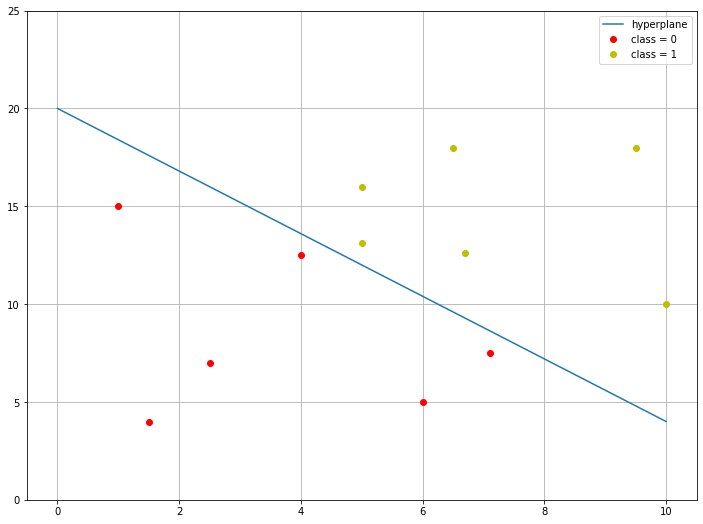

In [3]:
plt.plot(xx, yy , label="hyperplane")
plt.plot(4, 12.5, "ro", label="class = 0") 
plt.plot(2.5, 7, "ro") 
plt.plot(6, 5, "ro") 
plt.plot(1, 15, "ro") 
plt.plot(1.5, 4, "ro") 
plt.plot(7.1, 7.5, "ro") 


plt.plot(9-4, 25-11.9, "yo", label="class = 1") 
plt.plot(12-2.5, 25-7, "yo") 
plt.plot(11-6, 21-5, "yo") 
plt.plot(11-1, 25-15, "yo") 
plt.plot(8-1.5, 22-4, "yo") 
plt.plot(11-4.3, 23-10.4, "yo") 
plt.grid()
plt.legend()
plt.ylim((0,25))

**Prediction**

Later, for prediction, we will need a formula such that any points will have a value given by the right angle distance from the line, and this will be either positive or negative. We can then use a function to ceil all positive points to 1 and floor all negative points to -1 one, thus providing us new labels.



Therefore we need an algorithm that will yield a value $ \geq 0$ iff the point is above the line, and a value $ < 0$ iff the point is below the line. It probably required. However, this is getting ahead of ourselves.

That said, when predicting, we may also want to have some kind of preference towards one set of labels or another, we can do this by simply changing the intercept values $a_0$, pushing the line artificially up for down.

**Building the model**

However, for now we must imagine that we have a set of existing labelled data since classification is a form of **supervised learning**. The task is simply to draw a line that divides one class of points from another without any error. 

We can imagine getting a table with the following format:

X-axis value | Y-axis value | Label
---|---|---
2.4|1.2|0
4.2|3.2|0
8.9|14.1|1
6.2|5.3|0

We then need to convert to the following to make our model work:

X-axis value | Y-axis value | Label
---|---|---
2.4|1.2|-1
4.2|3.2|-1
8.9|14.1|1
6.2|5.3|-1

Which is to say that we must use the labels -1 and 1 and not 0 and 1.

We can say that the primary task is to **avoid errors** when dividing the two classes of data point, typically by means of a linear function (although other kernels are possible).

Another consideration might that we want to **maximise the margin** which is simply to maximise the distance of the line from all existing data points, even when those data points are on the correct side of the hyperplane. One way of seeing this is that we are **minimising number and severity of near errors.** We should do this because it will improve the chances of our future predictions being correct.

The margin can be considered the **width of the road** that divides the two sets of datapoints that belong to different classes. Changing the angle of the line might let us increase this margin substantially while still perfectly dividing the two classes of data point.

This means that, while the process for picking the line to divide the data points may foremost want to take a position that minimises the number of classification errors it makes, but it also might want to maximise the margin between data points and thus reduce the number of near mistakes too as the latter will make for better future prediction. 

Thus we have a question of:

- avoiding errors
- maximising the distance of the hyperplane from any points

This is actually an optimisation problem wherein we imagine the values $(a_0, a_1, \ldots, a_m)$ to be variables and the data points to be constants. It may need to be solved brute force by a solver.

The margin lines can be given:

$a_0 + a_1x_1 + a_2x_2 + \ldots + a_mx_m = M$

$a_0 + a_1x_1 + a_2x_2 + \ldots + a_mx_m = -M$

Where $M$ is the degree of margin that we want to maximise.

Below we see a visual representation of how we might have a margin:

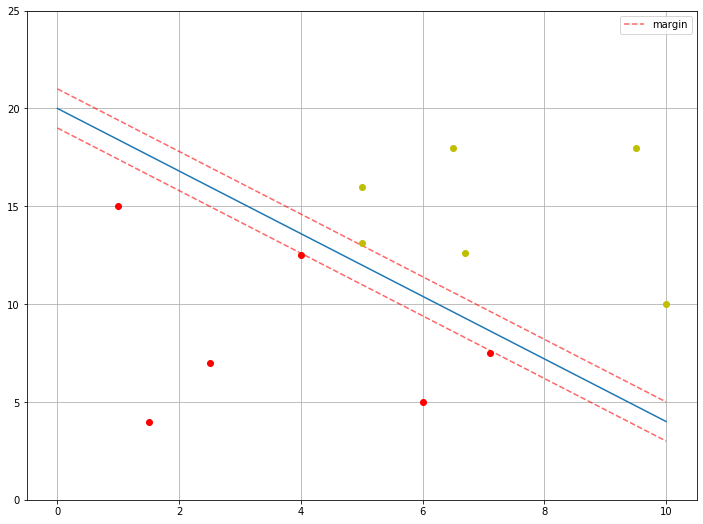

In [4]:
a0 = 20
a1 = -1.6


xx = np.linspace(0,10,100)
yy = a0 + a1*xx
plt.plot(xx, yy)
plt.plot(xx, yy+1, "r--", alpha=0.6, label="margin")
plt.plot(xx, yy-1, "r--", alpha=0.6)

plt.plot(4, 12.5, "ro") 
plt.plot(2.5, 7, "ro") 
plt.plot(6, 5, "ro") 
plt.plot(1, 15, "ro") 
plt.plot(1.5, 4, "ro") 
plt.plot(7.1, 7.5, "ro") 


plt.plot(9-4, 25-11.9, "yo") 
plt.plot(12-2.5, 25-7, "yo") 
plt.plot(11-6, 21-5, "yo") 
plt.plot(11-1, 25-15, "yo") 
plt.plot(8-1.5, 22-4, "yo") 
plt.plot(11-4.3, 23-10.4, "yo") 


plt.grid()
plt.ylim((0,25))
plt.legend()
plt.show()

**Prediction**

Let's imagine a new point on the Cartesian plane with the coords (2, 10). This could be a new data point for which we wish to perform prediction:

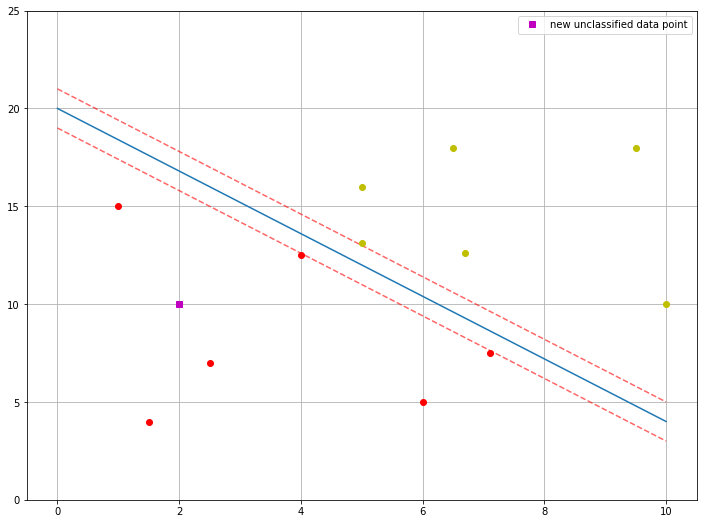

In [5]:
a0 = 20
a1 = -1.6


xx = np.linspace(0,10,100)
yy = a0 + a1*xx
plt.plot(xx, yy)
plt.plot(xx, yy+1, "r--", alpha=0.6)
plt.plot(xx, yy-1, "r--", alpha=0.6)
plt.plot(4, 12.5, "ro") 
plt.plot(2.5, 7, "ro") 
plt.plot(6, 5, "ro") 
plt.plot(1, 15, "ro") 
plt.plot(1.5, 4, "ro") 
plt.plot(7.1, 7.5, "ro") 


plt.plot(9-4, 25-11.9, "yo") 
plt.plot(12-2.5, 25-7, "yo") 
plt.plot(11-6, 21-5, "yo") 
plt.plot(11-1, 25-15, "yo") 
plt.plot(8-1.5, 22-4, "yo") 
plt.plot(11-4.3, 23-10.4, "yo") 
plt.ylim((0,25))
plt.plot(2, 10, "ms", label="new unclassified data point") 
plt.grid()
plt.legend()
plt.show()


For such a point, we need a formula such that for this case the the output value will correspond to the predicted label (here -1). Our prediction would be that the new data point should be red.

**Building the model**

So what we actually need to ensure that our line does not make any errors is a set of optimised coefficients $(a_0, a_1, \ldots, a_m)$ such that the following is true for all data points $x_j$:

For yellow points:

$a_1x_{1j} + a_2x_{2j} + \ldots + a_mx_{mj} + a_0 \geq 1$

for red points:

$a_1x_{1j} + a_2x_{2j} + \ldots + a_mx_{mj} + a_0 \leq -1$

For all points:

$(a_1x_{1j} + a_2x_{2j} + \ldots + a_mx_{mj} + a_0)y_j \geq 1$

One way to conceive of this is as a constraint set for optimisation.

Remember that here we are only thinking about defining the hyperplane and not about prediction.

From this it follows that, for any of the coordinates representing a data point, if the data point is labelled -1 and is therefore be below the hyperplane, applying the coefficients to the datapoint and then multiplying it by its label should result in a positive value greater or equal to 1. That means that applying the coefficients to the data point must result in a negative value that itself is less than or equal to -1 else this multiplicative rule would not be true. In a way, the final constraint is a consequences of the prior two constraints.



The distance between two parallel lines, such as our margins, can be given:

$\frac{2}{\sqrt{\sum_i{(a_i)^2}}}$

If we can minimise the formula given below, then we maximise the margin. The term for minimisation is essentially the **sum of squares** of the coefficients. 

We want to minimise the sum of squares (much like in regression) to maximise the margin because this means the most distance between the data points and the hyperplane. 

Because what we're actually measuring is the 2 divided by the square of the sum of squares, we actually want the sum of squares to be small, so the square root will be small, so the quotient will be big!

Note that the start of the sum is i = 1, the intercept is not part of the sum for margin: 

$\min_{a_0, \ldots, a_m} \sum^m_{i=1}{(a_i)^2}$

where $a_i$ is a coefficient for the hyperplane.

But this is subject to the constraint that for all points, the following should be true:

$(a_0 + a_1x_{1j} + a_2x_{2j} + \ldots + a_mx_{mj})y_j \geq 1$

Which means that that the margin constraint is subject to there being **no errors in classification, which for hard classification is required.**

As an aside, in theory, this could be rewritten:

$\max_{a_0, \ldots, a_m} \frac{2}{\sqrt{\sum_i{(a_i)^2}}}$

In [6]:
# To show the math:

print("sum of squares")
print(1)
print(0.001)
print(0.000001)

print("\n")
print("square roots")
print(np.sqrt(1))
print(np.sqrt(0.001))
print(np.sqrt(0.000001))

print("\n")
print("quotients")
print(2/np.sqrt(1))
print(2/np.sqrt(0.001))
print(2/np.sqrt(0.000001))

sum of squares
1
0.001
1e-06


square roots
1.0
0.03162277660168379
0.001


quotients
2.0
63.24555320336759
2000.0


#### Soft classification ####

In some cases, a perfect division of our known classes will not be possible. Some points will be on the wrong side of the line. 

For soft classification, we can use the following constraints:

If a point is on the correct side:

$(\sum^m_{i=1}a_ix_{ij} + a_0)y_j \geq 1$

Or if it's on the wrong side:

$(\sum^m_{i=1}a_ix_{ij} + a_0)y_j < 1$

From this is follows for wrongly classified points:

$(\sum^m_{i=1}a_ix_{ij} + a_0)y_j - 1 < 0$

The above formula that substracts 1 for wrong-side points yields the amount of error i.e. how far over the wrong side of the hyperplane a data point is. Whatever we have left after substracting 1 is the distance the incorrectly classified point is over from the correct side of the hyperplane. 

Since this is soft classification, we have to tolerate this, but obviously we want to minimise it.

The degree of error for some data point j can be written:

$\max \{ 0,1 - (\sum^m_{i=1}a_ix_{ij} + a_0)y_j \}$

To minimise the total error for all data points (i.e. the minimise the number of points on the wrong side of the line and the degree to which they are on the wrong side), we use:

$\sum^n_{j=1} \max \{ 0,1 - (\sum^m_{i=1}a_ix_{ij} + a_0)y_j \}$


If we want to balance the importance of the degree of margin with this consideration, we can use:

$\min_{a_0, \ldots, a_m} \sum^n_{j=1} \max \{ 0,1 - (\sum^m_{i=1}a_ix_{ij} + a_0)y_j \} + \lambda \sum^m_{i=1} (a_i)^2$

The larger lambda becomes, the more important the existence of a large margin becomes relative to avoiding mistakes. A small lambda value means accuracy i.e. avoiding mistakes, becomes more important than the margin! This is a constrained optimisation problem.

A **low value for lambda** could be considered the same as a **high C parameter**, since they both mean that **accuracy comes first**. This could, of course, lead to overfit which will harm our future predictions.

However, a **high value for lambda** could be considered the same as a **low C parameter**, since they both mean that **margin i.e. safety for prediction come first**, even if it means misclassifying a few points.

In theory, we now have everything we need to assess the model. Let's remember that the yellow circles (the 1 values) should be above the hyperplane.

Below we see an example of how a potential hyperplane might be assessed for margin by an optimisation solver. 

The distance error is: 54.32891941379991
The distance error squared is: 938.6312547176099


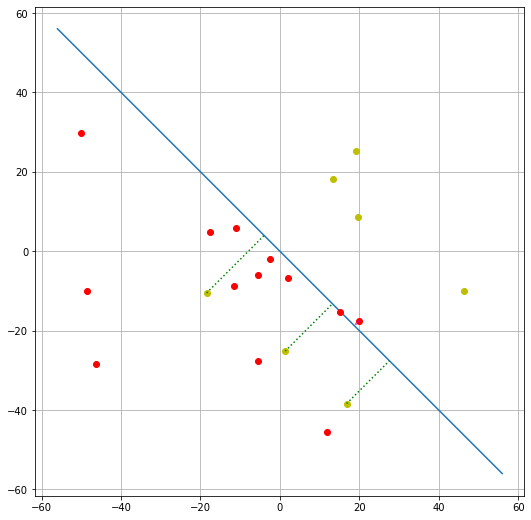

In [7]:
a0 = 0
a1 = -1

numpoints = 20
scale = 20
margin = 0
spread = 0.9
centroids = True
redcentroid = (-5,-5)
yelcentroid = (5,5)


plt.axes().set_aspect('equal')

origscale = scale
scale = scale*(1+(spread*2))

xx = np.linspace(-scale,scale,100)
yy = a0 + a1*xx
plt.plot(xx, yy)

plt.grid()

randxx = np.random.normal(0, int(origscale*spread), numpoints) 
randyy = np.random.normal(0, int(origscale*spread), numpoints)
randclass = np.random.randint(0,2,numpoints)

points = [[a,b,c] for a,b,c in zip(randxx, randyy, randclass)]

if centroids == True:
    for _ in range(len(points)):
        if points[_][2] == 0:
            points[_][0] += redcentroid[0]
            points[_][1] += redcentroid[1]
        else:
            points[_][0] += yelcentroid[0]
            points[_][1] += yelcentroid[1]


for x,y,c in points:
    

    
    if c == 0:
        plt.plot(x,y, "ro")
    else:
        plt.plot(x,y, "yo")

disterror = 0 
disterrorsq = 0 

# Remember arctan takes m from the slope intercept and not a from standard form: check polarity

angle = np.arctan(a1) 

for x,y,c in points:
    
    
    above = True
    yres = a0 + a1*x
    if yres > y:
        above = False
        
    # Let us imagine that we want the yellow circles (the 1 values) to be above the line
    
    if c == 0:
        if above == True:
            dist = abs(((-a1)*x + y - a0))/np.sqrt((-a1)**2 + 1)
            disterror += dist
            disterrorsq += dist**2
            plt.plot((x, np.cos(angle - np.deg2rad(90))*dist + x), (y, np.sin(angle - np.deg2rad(90))*dist + y), "m:")
    else:
        if above == False:
            dist = abs(((-a1)*x + y - a0))/np.sqrt((-a1)**2 + 1)
            disterror += dist
            disterrorsq += dist**2
            plt.plot((x, np.cos(angle + np.deg2rad(90))*dist + x), (y, np.sin(angle + np.deg2rad(90))*dist + y), "g:")

print(f"The distance error is: {disterror}")
print(f"The distance error squared is: {disterrorsq}")


plt.show()

This model is known as a **Support Vector Machine**. Some of the benefits of SVM are that:

1. Good at **high dimensional data**
2. Works well on **small data sets**

SVMs are not limited to only one line either. We can have as many as we want, which means we can have as many classes as we want. We can also use kernels to build hyperplanes in extra dimensions, then reduce dimensionality resulting in a non-linear hyperplane. 

#### Choosing an intercept to reflect desired weighting ####

For hard classification:

$a_1x_1 + a_2x_2 + \ldots + a_mx_m + [\beta(a_0 - 1) + (1 - \beta)(a_0 + 1)] = 0$

Where $\beta \in [0,1]$

Thus if $\beta = 0.75$, it would make the pessimistic classification more likely to reflect the high cost of a mistaken positive classification.

This approach maintains the constraint of hard classification that no data point fall on the wrong side of the hyperplane.


For soft classification:

$\min_{a_0, \ldots, a_m} \sum^n_{j=1} m_j \max \{ 0,1 - (\sum^m_{i=1}a_ix_{ij} + a_0)y_j \} + \lambda \sum^m_{i=1} (a_i)^2$

Where $m_j$ is a penalty term. 

$m_j > 1$ means more costly errors

$m_j < 1$ means less costly errors

It is frequently necessary to **scale** the data to make such adjustments work!! Typically a scale between 0 and 1 is used!

Furthermore, when investigating a set of coefficients e.g.

$a_0 + a_1x_1 + a_2x_2 + \ldots + a_mx_m = 0$

A coefficient whose value is close to zero entails that the particular dimension (attribute) is not relevant to the classification and can probably just be removed!

Finally, kernel methods can be used to create non-linear support vectors e.g. quadratic

#### How to calculate some distances (a geometrical aside) ####

There standard formula for a line is given:

$ax + by + c = 0$

We can convert this to:

$y = \frac{-ax - c}{b}$

Our line is currently

$y = - 1.6x + 20$

Thus:

$ 1.6x + y = 20 $

y-intercept $= 20$  
x-intercept $= 20/1.6 = 12.5$  

$1.6x + y - 20 = 0$

The distance from a point to a line is given:

$d = \frac{|ax_1 + by_1 + c|}{\sqrt{a^2 + b^2}}$

where $x_1$ and $y_1$ are the coordinates of the point. Our coordinate is currently $(2,10)$. Thus

$\frac{|(1.6)2 + (1)10 - 20|}{\sqrt{(1.6)^2 + 1^2}}$

The distance of $(2,10)$ from the hyperplane is thus:

$Distance \approx 3.604$

Distance from point to line is: 3.603992792021624


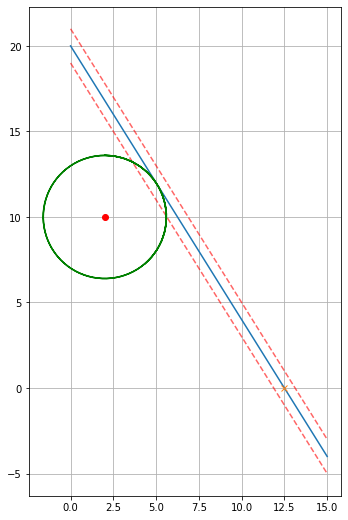

In [8]:
a = 1.6
b = 1
c = -20
x = 2
y = 10

plt.axes().set_aspect('equal')

xx = np.linspace(0,15,100)

yy = (-a*xx + -c)/b

plt.plot(xx,yy)
plt.plot(xx, yy+1, "r--", alpha=0.6)
plt.plot(xx, yy-1, "r--", alpha=0.6)
plt.plot(x,y, "ro")
plt.plot(12.5,0, "x")
plt.plot()
plt.grid()

print(f"Distance from point to line is: {abs((a*x + b*y + c))/np.sqrt(a**2 + b**2)}")

dist = abs((a*x + b*y + c))/np.sqrt(a**2 + b**2)

circyy = dist*np.cos(xx) + 10
circxx = dist*np.sin(xx) + 2

plt.plot(circxx, circyy, "g")

The angle between a line and the x-axis and a line given in slope-intercept form can be given:

$y = mx + b$

$\arctan{m}$

This gives us the angle of the line from the x-axis in the + direction.

Since out m value is negative, we will have a negative radian (moving closewise from 3'o'clock)

By adding 90 degrees (as a radian), we can find out the angle that runs direct from the point to the line.

In [9]:
print("angle of line is: ", np.arctan(-a))
angle = np.arctan(-a) + np.deg2rad(90) 
print("angle at 90 degrees to line is: ", angle)

angle of line is:  -1.0121970114513341
angle at 90 degrees to line is:  0.5585993153435624


Distance from point to line is: 3.603992792021624
The angle from the point to line is: 0.5585993153435624


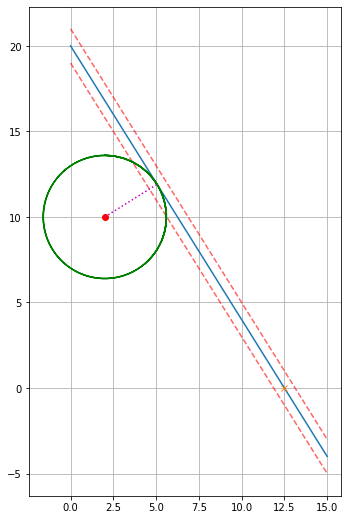

In [10]:
plt.axes().set_aspect('equal')

xx = np.linspace(0,15,100)

yy = (-a*xx + -c)/b

plt.plot(xx,yy)
plt.plot(xx, yy+1, "r--", alpha=0.6)
plt.plot(xx, yy-1, "r--", alpha=0.6)
plt.plot(x,y, "ro")
plt.plot(12.5,0, "x")
plt.plot()
plt.grid()

print(f"Distance from point to line is: {abs((a*x + b*y + c))/np.sqrt(a**2 + b**2)}")
print(f"The angle from the point to line is: {angle}")

dist = abs((a*x + b*y + c))/np.sqrt(a**2 + b**2)

circxx = dist*np.sin(xx) + x
circyy = dist*np.cos(xx) + y

plt.plot(circxx, circyy, "g")
plt.plot((x, np.cos(angle)*dist + x), (y, np.sin(angle)*dist + y), "m:")

#### Scaling and Standardisation ####

Scaling is used when two or more dimensions that have very different scales e.g. age (1-120), annual income (0 - 10,000,000+). We scale the data to the same interval e.g. between 0 and 1. We need to do this when calculating the **sum of squares of the coefficients** since otherwise our scales won't match and our calculation will favour errors in one dimension over another.

Let $x_{min j}$ define $\min_i x_{ij}$  i.e. the lowest value in the column i is its min

Let $x_{max j}$ define by $\max_i x_{ij}$ i.e. the high value in the column i is its max

For each data point we apply this formula:

$x^{scaled}_{ij} = \frac{x_{ij} - x_{min j}}{x_{max j} - x_{min j}}$

If we then want to convert the data so it is scaled between two other values (other than 0 and 1), we can then apply the following:

$x_{ij}^{scaled[a,b]} = (x_{ij}^{scaled[0,1]} \cdot (a-b)) + b$

In [11]:
data = np.random.randint(0, 100, 200)

xmax = max(data)
xmin = min(data)

scaled = list()
for _ in data:
    
    scaled.append((_ - xmin)/(xmax - xmin))
    
print(scaled[0:20])

[0.2653061224489796, 0.4897959183673469, 0.16326530612244897, 0.5714285714285714, 0.6530612244897959, 0.47959183673469385, 0.30612244897959184, 0.11224489795918367, 0.7959183673469388, 0.6938775510204082, 0.0, 0.3877551020408163, 0.05102040816326531, 0.07142857142857142, 0.9489795918367347, 0.9693877551020408, 0.7448979591836735, 0.9897959183673469, 0.8571428571428571, 0.10204081632653061]


As we see above we get the scaled data between 0 and 1 based on the range of the initial array

**Standardisation** is when we scale **to a normal distribution**. Commonly this means assuming the mean = 0 and the standard deviation = 1. This also means that each value is also a measure of the std from the mean.

A factor j has a mean $\mu_j = \frac{\sum^n_{i=1} x_{ij}}{n}$

A factor j has a standard deviation of $\sigma_j = \sqrt{\frac{\sum_{i=1}^n{(x_{ij}-\mu_j)^2}}{n}}$

Thus for each data point i:

$ x^{standardised}_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}  $

In [12]:
n = len(data)
mu = sum(data)/n
sigma = np.sqrt((sum([(_ - mu)**2 for _ in data])/n))

standardised = list()
for _ in data:
    
    standardised.append((_ - mu)/sigma)
    
print(standardised[0:20]) 

[-0.9065753920823812, -0.09828122284986292, -1.2739818326426169, 0.19564392959832555, 0.489569082046514, -0.13502186690588647, -0.759612815858287, -1.4576850529227345, 1.003938098830844, 0.6365316582706083, -1.8618321375389937, -0.4656876634100985, -1.678128917258876, -1.6046476291468288, 1.5550477596711971, 1.6285290477832444, 0.8202348785507261, 1.7020103358952914, 1.2243819631669852, -1.4944256969787582]


Above we see the standardised data! Below we see it's roughly normally distributed!

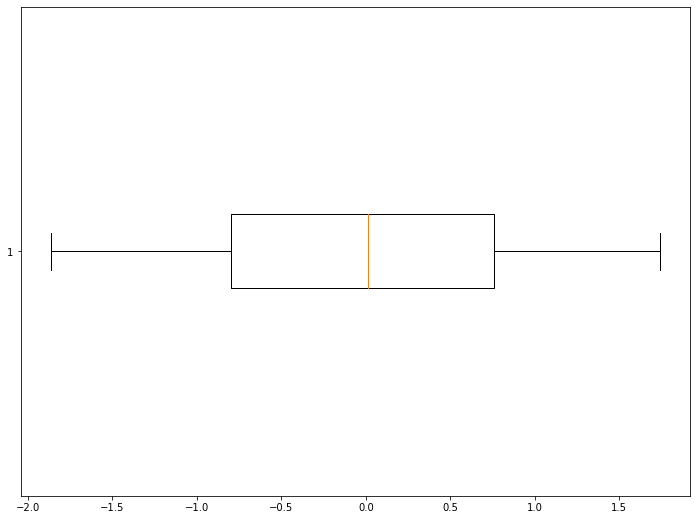

In [13]:
plt.boxplot(standardised, vert = False)
plt.show()

Note that for **scaling** to be used, we need data that we know will be **within a bounded range**, otherwise any new data that is outside the range will be less than 0 or greater than 1! Examples: RGB color intensities, SAT scores, neural networks, exam scores.

**Standardisation** is better when there is **no bounded range** provided we can **assume an underlying normal distribution** e.g. PCA, Clustering

#### K-nearest neighbour (KNN) classification #### 

This approach works well for cases where we want more than two classes. 

We just assume that any new point that we add to the data set is similar to the pointest nearest to it. So if k = 5, we look at the 5 nearest points, and give the new data point the classification that occurs most commonly among its neighbours. Choosing a value for k is typically a valdiation problem (whereby we test multiple models and compare to find the best performer).

One thing to consider is how we measure the distance between two points in i dimensional space i.e. the distance norm

$Distance = \sqrt[p]{\sum_{i=1}^n |{x_i - y_i}|^p}$

where: 

$n$ is the number of attributes/factors/predictors (i.e. dimensions, not data points) and p is the norm.

$x_i$ is a vector of coordinates for a point.

$y_i$ is a vector of coordinates for the relevant centroid.

And $i$ is a dimension in our data set i.e. an attribute.

In two dimensions i.e. two attributes, we essentially have:

$Distance = \sqrt[p]{ (x_1 - y_1)^p + (x_2 - y_2)^p}$

Where $(x_1, x_2)$ is a point

And $(y_1, y_2)$ is a centroid

The above would yield the distance from $(x_1, x_2)$ to $(y_1, y_2)$ according to the $p$ norm

Common values for p are:

1 : one-norm (the route a vector takes, Manhattan, Rectilinear)  
2 : two-norm (the Euclidean norm i.e. the straight line distance from point to centroid)  
$\infty$ : infinity-norm (technically the limit as we approach infinity. This just ends up being the largest distance taken in any dimension! i.e. $max(x_i - y_i))$ for all n dimensions.

We can also use weighting, which can be tricky to balance:

$\sqrt[p]{\sum_{i=1}^n w_i |{x_i - y_i}|^p}$

where $w_i$ is the weighting value. We could use different weightings for different attributes (i.e. dimensions) depending on how important we deem them to be.

In [14]:
vec1 = np.random.normal(0,1,20)
vec2 = np.random.normal(0,1,20)

In [15]:
# Below see an interative approach

p = 2

output = 0

for a,b in zip(vec1,vec2):
    
    output += abs(a-b)**p

output = output**(1/p)

print(output)

# Below see a vector approach

print(sum((abs(vec1-vec2))**p)**(1/p))

7.104218655340442
7.104218655340442


Note that we must square the constitutes of vec1 - vec2 before we sum them!

#### Validation (Week 2) ####

Valdiation is checking to see how well a model performs, particularly when comparing it again other similar models. 

Performance on a test data set is not enough to help us distinguish between models most of the time. 

Models will respond to two kinds of pattern:

1. Real effects: real relationships between predictors/features and responses.  

2. Random effects: Conincidence caused by random factors that the model nonetheless learns from.  

Observed performance = real quality + random effects

This inclusion of random effects specific to the training set can make our model appear too good. It is over optimistic. This is known as overfit. 

Let's imagine we have 3 models which, when trained, we see 86%, 89%, and 92% accuracy in classification on the training set respectively.

We should choose the 92% right? WRONG!

The difference might be explained by random effects in the test data simply favouring the best performing model! 

As a rule of thumb, if we are only looking to build ONE MODEL, then we just need to split the data into a training set (70-90% of data) and a test set (10-30% of data).

HOWEVER, if we building MULTIPLE MODELS for comparison, then we need training set (50-70% of data), test set (15-25% of data), validation set (15-25% of data). Thus we see that the validation and test sets should be of roughly equal size.

Two common methods for splitting are:
    
1. Random split: select data point indices randomly without replacement until all are assigned.

2. Rotation: 6 to train, 2 to test, 2 to valdiation, repeat until all data points are assigned to some set.

Random split is at the mercy of the RNG gods. This can lead to a weighted test set.

Rotation can be affected by sequential patterns in the data set, perhaps the data is in time-order and days of the week mean all  weekends end up in the test set, for example. A stratified random sampling approach can be used to counter this.

Validation can also be used to compare different models e.g. SVM vs KNN, to see which is really the better model!

Typically the order is:

1) Train models on training set --> 2) Validate to select between models --> 3) Test on test set to determine true performance

If we only have one model, step 2) can be skipped!

#### Cross Validation ####

In cross validation tries to avoid the problem of significant data only showing up in test and/or validation sets, and thus not being trained on.

For example, **K-Fold Cross Validiation** achieves this by keeping the training and validation set together. Validation is achieved by partitioning the single training (& validation) set into k subsets. 

Each subset is then used once to validate each of the set of model types, while simultaneously an instance of each model type is trained on all other subsets until every possible combination of subsets has been used to train an individual model for each model type. We can then use the average performance of each type of model across all combinations to assess the quality of the model type.

To put this in mathematical terms, each subset is used $k-1$ times for training, and just once for validation.

HOWEVER, we DO NOT USE these models. Nor do we use an average of these models to generate responses. Nor do we use the average coefficients from these models. Cross Validation is just for information on comparative model performance and nada mas. 

k = 10 is the most commonly used number of subsets.

#### Clustering (Week 2) ####

NOTE: Clustering is a form of **unsupervised learning** i.e. we do not have a response vector to train the model on. This also means we are looking for something new. Something that we can't easily see.

Clustering is about taking and putting them into groups on a basis of an analysis of their similiarity. 

Use case: Targeted marketing i.e. looking for specific groups of customers who are more likely to be influenced by, say, an email ad with a certain message. Some people might be more susceptible to messages about a products utility, while another might be more susceptible to messages about a product's brand image. We could cluster our customers on that basis. We could also have more clusters for different messages e.g. price.

Once we identify these clusters, clustering can also help us learn more about the cluster. It doesn't just find what you expect.


Clustering is also used in many other situation e.g. image recognition, data investigation, city planning

The number of clusters is usually specified as a parameter. Choosing the best number of clusters is worth a whole other section since it is a tricky optimisation problem.

One measure of the quality of a cluster is the total distance of all data points within the cluster from its centroid. This is the **Within Cluster-sum-of-squares** aka the **WCSS**.

This requires us to measure distance. This again: 

$Distance = \sqrt[p]{\sum_{i=1}^n |{x_i - y_i}|^p}$

where n is the number of dimensions (i.e. predictors/factors) and p is the norm.

#### Clustering optimisation ####

The optimal solution to a clustering problem is actually extremely complex and computationally demanding:

Let:

$x_{ij}$ be the value of the jth attribute of data point i.

For some cluster called k, be:

$y_{ik}$ be a value 1 or 0 indicating whether data point i is a member of k or not.

For each dimension (attribute) j, let:

$z_{jk}$ be the jth dimensional coordinate for the centre of cluster k (centroid).

The centroid for some cluster k would thus be:

$z_{j_1k}, z_{j_2k}, z_{j_3k}, \ldots, z_{j_mk}, $

The optimisation problem is therefore:

$\min_{y,z} \sum_i \sum_k y_{ik} \sqrt{\sum_j (x_{ij} - z_{jk})^2}$

Which is simply to say we add up all the distances to centroid for all the data points in each cluster and sum them and try to minimise this value. The optimal solution is the correct number of clusters each with a correctly positioned centroid such that the distance of all the data points in the data set to their respective cluster centroid is minimised.

This is subject to the condition:

$\sum_k y_{ik} = 1$

Which is simply to say that each data point must belong to one and only one cluster.

$(x_{ij} - z_{jk})^2$

This term is simply the Euclidean distance between a point and its centroid.

This optimisation problem will yield the ideal number of clusters for the data set. However, as we said, it is hard to solve (note that it is at least a integer problem due to the presence of a binary variable).

#### K-means algorithm ####

K-means clustering approaches do not solve this optimisation problem in reality. Rather they rely on an iterative method to achieve good-enough answers. This is because the number of clusters is specified as a parameter.

A big advantage of this is that it saves COMPUTATIONAL RESOURCES.

Essentially it works as follows:

1. Pick a datapoint to act as centroid at random. One for each of the k clusters specified by a parameter.

2. Assign each data point to the cluster whose centroid is closest.

3. With this data, recalculate the cluster centroids based on the clusters we've found. We simply use the middle of the clusters we've identified.

4. Repeat steps 2. and 3. until no change occurs (convergence).

This is a heuristic approach, because it does not always yield the optimal answer!

It is also an example of an expectation-maximisation algorithm.

Expectation step: Find centroids

Maximisation step: Assign data points to clusters (actually minimise, since we minimise the total distance, but this is quite irrelevant here; we could easily conceive of this as maximising the negative distance if we wanted).

Reiterate until a good enough solution is found.

#### Practical considerations for k-means algorithm ####

The k-means algorithm simply assigns any outliers to their nearest cluster. This is not ideal. One solution is to simply remove outliers and rerun the algorithm so it doesn't bias the position of the centroids, but this is not always wise when we cannot establish if that the outlier was just due to faulty data collection e.g. malfunction of device. Always diagnose your outliers and why they exist!

Because the k-means algorithm is a heuristic, even if we know what value of k we need, it often makes sense of run it multiple times with different randomly generated starting positions for the centroids, just so we can see which is best.

Another way to increase the effectiveness of the k-means clustering approach is to use different values of k. The best value can be highly situational! Obviously the high value for k will result in less distance between data points and their cluster centroids. In fact, k = n would mean no distance whatsoever, but this is not remotely informative, so we need to balance total distance with having the lowest number of clusters we can justify!

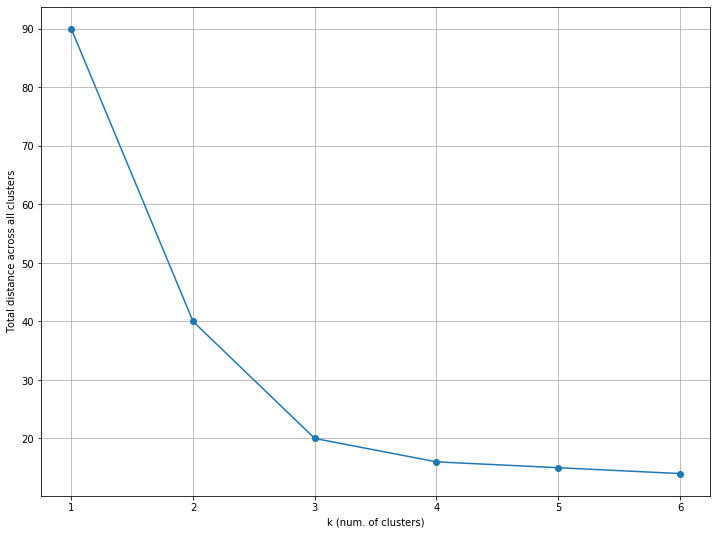

In [16]:
elbowvals = [90,40,20,16,15,14]

plt.plot([_ for _ in range(1,7)], elbowvals, "o-")
plt.grid()
plt.xlabel('k (num. of clusters)')
plt.ylabel('Total distance across all clusters')
plt.show()

Above we see an **elbow diagram** for an imagined k means clustering algorithm model. Logically, the best value for k would appear to be three since this is where we see the "joint" in the elbow where the total distance begins to flatten out. We want to balance the reduction in total distance with the minimal number of clusters for maximum simplicity.  

#### Clustering for prediction ####

This is relatively simple. We simply assign new data points to the nearest cluster centre and say that that is their label. This means we are essentially segmenting a space into segments (determined by which centroid is closest), and saying that any data point that lands within a space belong to that cluster and thus has that label. This kind of segementation is known as a **Voronoi diagram**.

#### Clustering vs Classification ####

So what's the difference between these two? In short:

**Classification:** This is a form of **supervised learning** since we already have a dataset with set of labels (i.e. responses), each data point having a response label assigned, when we begin to use the approach!

**Clustering:** This is a form of **unsupervised learning** since we have no pre-existing labels and want to find a way to label the data based on what the model can establish!

#### Basic Data Preparation (Week 3) ####

We often use specific data in our analyses:

Predictors (regression)  
Factors (classification)

However, we often need to manipulate the data first, for example:

- Scaling 
- Standardisation
- Account for outliers

One common task we need to engage in as part of data preparation is outlier detection. Below we see a **point outlier** that might occur in a clustering problem. 

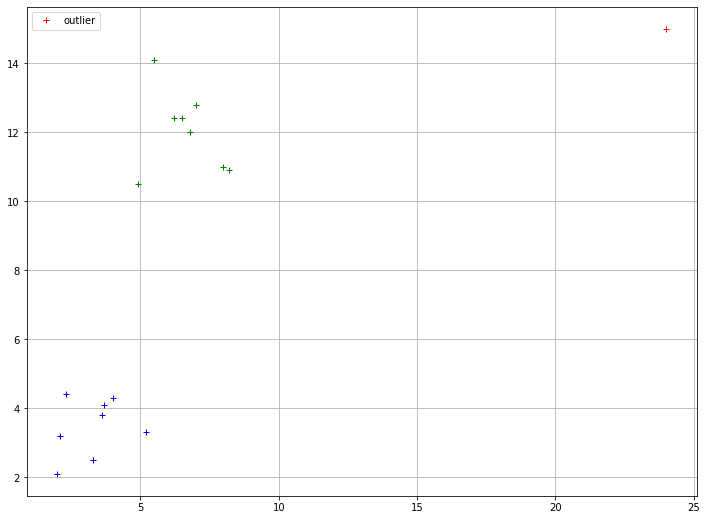

In [17]:
points = [(2.1,3.2),(3.3,2.5),(2,2.1),(3.6,3.8),(3.7,4.1),(2.3,4.4),(4,4.3), (5.2, 3.3)]

for _ in points:
    
    plt.plot(_[0],_[1], "b+")
    
points2 = [(3.2, 12.4), (5, 11), (4, 12.8), (3.8, 12), (5.2, 10.9), (2.5, 14.1), (3.5, 12.4), (1.9, 10.5)]

for _ in points2:
    
    plt.plot(_[0]+3,_[1], "g+")
    
plt.plot(24, 15, "r+", label = "outlier")
plt.grid()
plt.legend()
plt.show()

Below we see the kind of outlier we might see in time series data. This type is often called a **contextual outlier** since it is only an outlier relative to context.

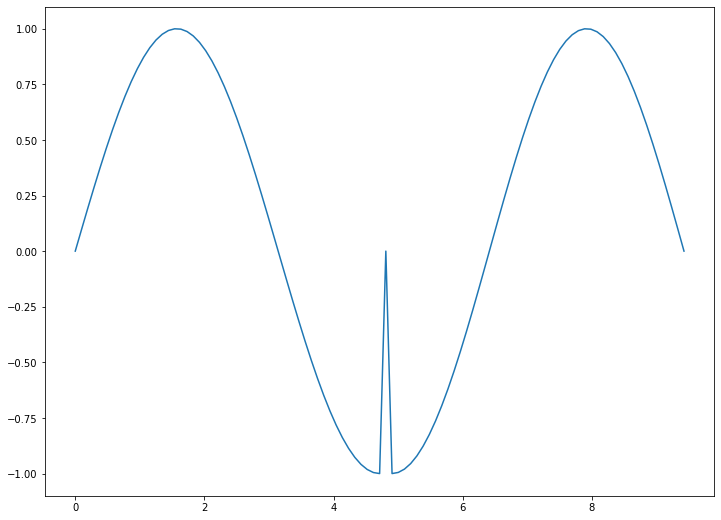

In [18]:
xx1 = np.linspace(0,np.pi*1.5,50)
xx2 = np.linspace(np.pi*1.5,np.pi*3,48)
yy = list()

for _ in xx1:
    
    yy.append(np.sin(_))
    
yy.append(0)

for _ in xx2:
    
    yy.append(np.sin(_))
    
plt.plot(np.linspace(0, np.pi*3, 99), yy )
plt.show()

We can also see **outliers by omission**. For example, in heartrate data we would expect to see regular spikes in blood pressure. A skipped beat would therefore constitute an outlier. This kind of outlier by omission is sometimes called a **collective outlier**.

A common tool for finding outliers in a single dimension is a box-and-whisker plot, as it gives us strong visual clues about the distribution of the data. 

The box represents the 25th and 75th percentiles. The tips of the whiskers represent the 10th/5th and 90th/95th percentile. As we can see, the outliers appear as a dot outside the scope of the whiskers. The mid point in the box is the **median** (not the mean)

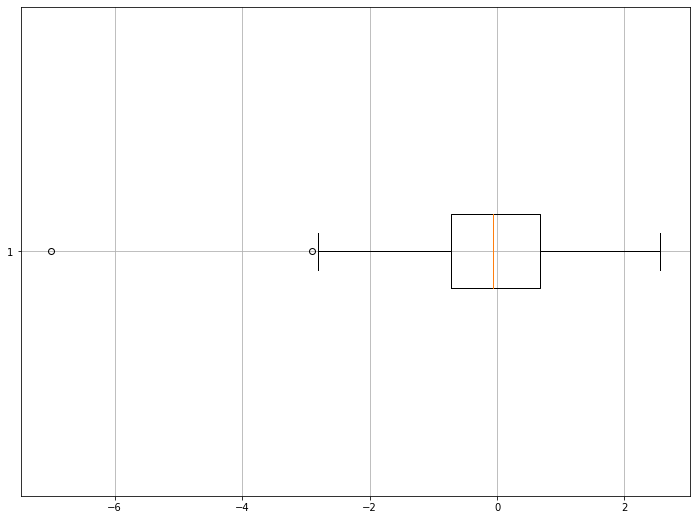

In [19]:
data = np.random.normal(0, 1, 200)

data = np.append(data, -7)

plt.boxplot(data, vert=False)
plt.grid()
plt.show()

#### Dealing with outliers #### 

We should also diagnose our outliers by trying to figure out why they exist. e.g. bad data (malfunction, input error) or something fishier (i.e. something real in the system we should not ignore).

If we conclude they should be dealt with, two common approaches are:

1. omission
2. imputation (covered in another section)

Some advice: 

- Consider whether the data is random and normally distributed. Then figure out how likely such an outlier is. With a large data set, we expect to see values that are 3 standard deviations from the mean at an expected frequency e.g. approx. 2000-3000 in a million data points (0.2-0.3% of data).

- Removing outliers can make a model too optimisitic if they are to be expected in future data the model will process. 

- Logistic regression can be used to quantify the probability of an outlier occurring.

#### Change Detection (Week 3) ####

Change detection is for sequential data, normally time series data. We might need to take an action when a certain degree of change occurs (not rate of change, and not whether a specific value has been exceeded, but culumative change over any time period).

Use cases: 

1. manufacturing process where we want to ignore sensor misreadings, but want to know if a certain component is growing too hot

2. trying to detect and quantify climate change  

3. establishing whether a government policy actually impacted anything

4. checking if voting patterns have changed for a certain demographic

These can be split into three kinds:

1. determining when intervention is required e.g. maintenance of component
2. determining if past action has impacted something e.g. government policy change
3. determining if change has occurred generally e.g. looking at voting demographics



#### Cusum Approach ####

Cusum essentially tells us if the mean of some observed distribution has exceeded a threshold. This is how we can define "quantity of change" regardless of the rate of change that doesn't simply put an arbitrary threshold on how high, or low, a value is permitted to go.

The distribution in question begins when the conditions for activation at met, which is (without an additional term), simply the point where the value of a time series starts to either increase or decrease. 

$S_t = \max\{0, S_{t-1} + (x_t - \mu_{expected})\}$

is $S_t > T$ ??

where $x_t$ is the observed value  
and $S_t$ is the change variable
and $T$ is the threshold

The above is looking for an **increase** in change. To achieve the same for a **decrease**, we could use **the min and turn the C value into a sum rather than a minus**. 

Assuming we're looking for increase, if $x_t$ exceeds the expected mean, then $S_t$ grows over time. If it stays a little over, it will grow slowly, if it goes a lot over, it will grow quickly. If $x_t$ starts to go down below the mean $\mu$, it will decrease. If it keeps going down, it will eventually reset as $S_t$ will become zero.

Sometimes, a little over the mean is perfectly fine, so we can account for this with a weighting $C$:

$S_t = \max\{0, S_{t-1} + (x_t - \mu_{expected}-C)\}$

is $St_t > T$ ??

$C$ thus decreases the sensitivity of the change detection model. The tricky part is often finetuning $T$ and $C$.

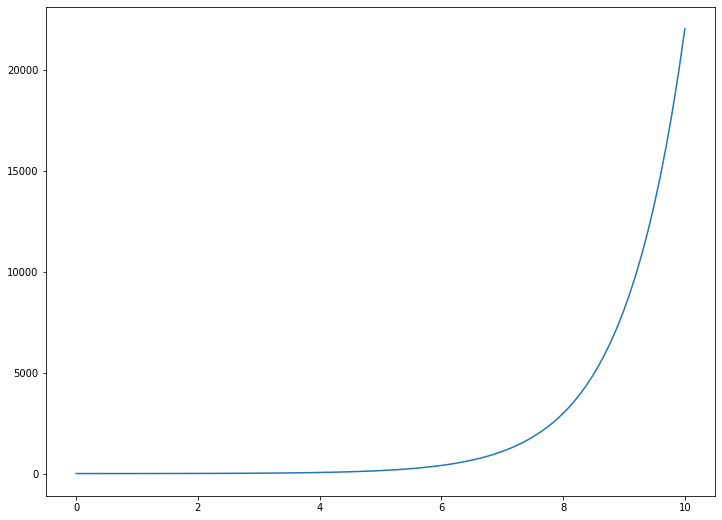

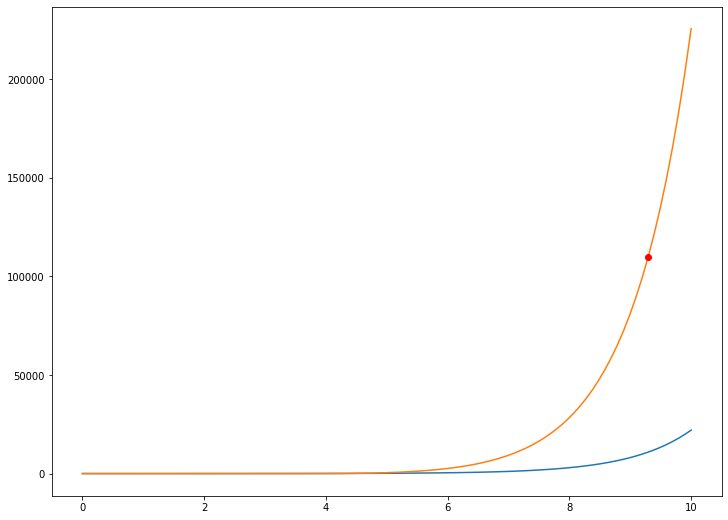

threshold exceed hits at: (9.292929292929292, 109701.45023671517)


In [20]:
xx = np.linspace(0,10,100)
yy = np.exp(xx)

plt.plot(xx, yy)
plt.show()

St = 0
Stm1 = 0
mu = 3
C = 50
T = 100000

stvec = []
count = 0
exceed = None
record = False

for _ in yy:
    
    St = max([0, Stm1 + (_ - mu - C)])
    Stm1 = St
    stvec.append(St)
    if St < T: 
        count += 1
    elif St >= T and record == False:
        exceed = St
        record = True
    else:
        continue
      
plt.plot(xx, yy)
plt.plot(xx, stvec)
plt.plot(xx[count], exceed, "ro")
plt.show()

print(f"threshold exceed hits at: {xx[count], exceed}")


#### Time Series Modelling (Week 4) ####

This module will first cover **exponential smoothing**

This model allows us to examine and represent features in time series data while **accounting for random variation**.

It also allows us to account for:

1. Trends (upwards and downwards movement)
2. Seasonality (cyclical patters)

However, the core mechanism is the ability to balance a value between previous values generated in the series and the current observed value at a specific time. The previous values in the series are of course generated by the model and not the actually observed values at that time. 

All other values in the series collectively weight the current value. It could be said to have an infinite memory for sake of analogy. 

This is useful because it allows us to account for **variation** in the time series. 

It can also distinguish real trends from random variation. 

A common use case is stock market data. Another might be trying to distinguish variation in blood pressure with a trend towards higher or lower blood pressure. 

The generated values are the baseline: $S_t$

The observed values are given: $x_t$

The weighting, a value between 0 and 1, which leans towards either the observed value, or the previous value in the series is given: $\alpha$

$S_t = \alpha x_t + (1-\alpha)S_{t-1}$

provided: $0 \leq \alpha \leq 1$

Thus if $\alpha$ is **higher**, the **observed value at t** becomes more important. Variance is therefore not so bad.

However, if $\alpha$ is **lower**, the **baseline** at t-1 becomes more important. Variance is possibly extreme.

The initial condition of this model i.e. when t = 1, is simply:

$S_1 = x_1$

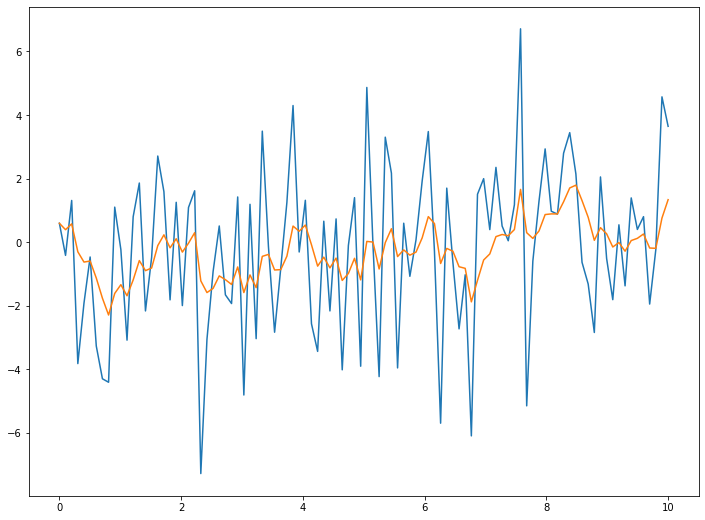

In [21]:
xx = np.linspace(0,10,100)
yy = np.random.normal(0,3,100)

plt.plot(xx, yy)

smooth = []

alpha = 0.2
stm1 = yy[0]

for xt in yy:
    
    st = alpha*xt + (1-alpha)*stm1
    smooth.append(st)
    stm1 = st
    
plt.plot(xx, smooth)
plt.show()
    
    

#### Trends and Cyclical Effects ####

We can introduce the term $T_t$ to act as the trend value to give us more indication of how much trend we are seeing:

$S_t = \alpha x_t + (1-\alpha)(S_{t-1} + T_t)$

The formula for $T_t$ is given:

$T_t = \beta(S_t - S_{t-1}) + (1-\beta)T_{t-1}$

Where the initial condition is:

$T_1 = 0$

And $\beta$ is the weighting we want to give towards the difference between the current value of $S_t$ and the previous value $S_{t-1}$ over the previous trend value. 

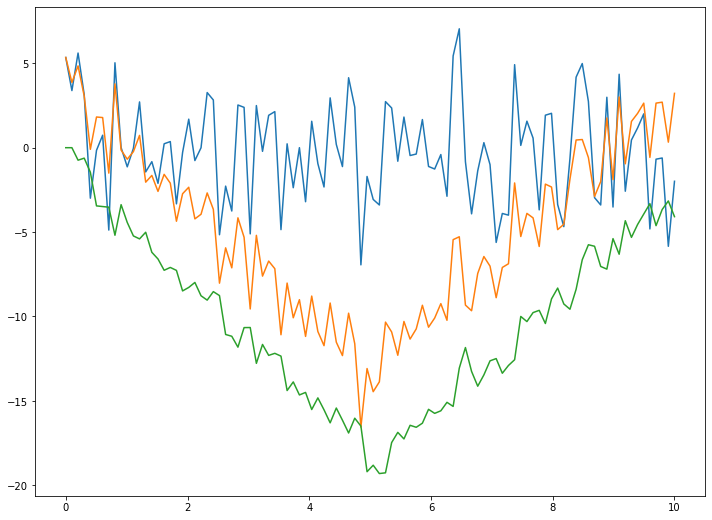

In [22]:
xx = np.linspace(0,10,100)
yy = np.random.normal(0,3,100)

plt.rcParams["figure.figsize"] = (12, 9)

plt.plot(xx, yy)

smooth = []

alpha = 0.5
beta = 0.5
stm1 = yy[0]
T_t = 0

Tvec = []

for _ in range(len(yy)):
    
    if _ < len(yy)/2:
        yy[_] = yy[_] - _
    else:
        yy[_] = yy[_] - (100 - _)

for xt in yy:
    
    st = alpha*xt + (1-alpha)*(stm1 - T_t)
    Tvec.append(T_t)
    smooth.append(st)
    T_t = beta*(st - stm1) + (1-beta)*T_t
    
    
plt.plot(xx, smooth)
plt.plot(xx, Tvec)
plt.show()


We see that the **higher the beta value**, the **more sensitive** the line becomes to changes in the trend i.e. the difference between $S_t$ and $S_{t-1}$. 

A **lower beta value**, sees **prior trend values** taking priority over the difference between $S_t$ and $S_{t-1}$

The blue line is the observed value. The yellow line is the baseline. The green line are the trend values.

As we see, the baseline is a compromise between the blue and the green.

When beta is high, the trend is almost identical to the base line, when beta is low it is extremely smooth.

**Cyclical trends** can also be dealt with in a similar way: by introducing them as an additive component of the formula. We could do this by using real data from previous cycles, for example.

However, we can also take a **multiplicative approach**. 

Let:

$L$ be the length of a cycle
$C$ be the multiplicative seasonality factor

$S_t = \frac{\alpha x_t}{C_{t-L}} + (1-\alpha)(S_{t-1} + T_{t-1})$

The formula above would be intended to account for both seasonality and trend.

$C$ is defined as:

$C_t = \gamma(x_t / S_t) + (1- \gamma)C_{t-L}$

with the initial condition being:

$C_1 = 1$

50.0


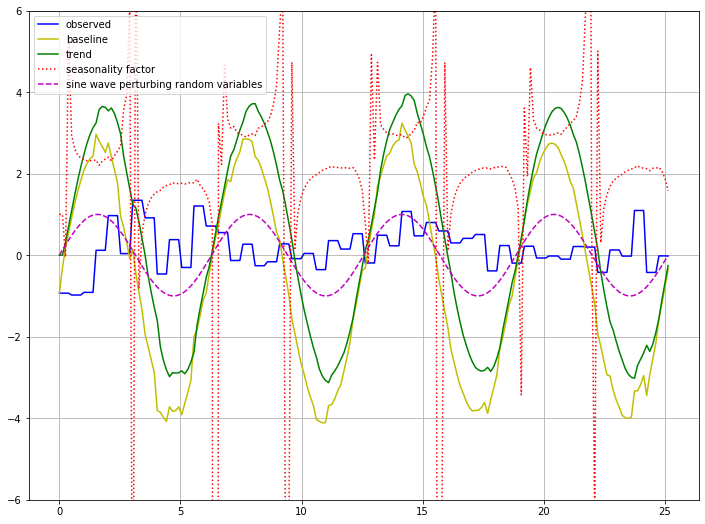

In [44]:
resolution = 200
pies = 8
xrange = pies*np.pi

xx = np.linspace(0,xrange,resolution)
yy = np.random.normal(0,0.5,int(resolution/4))
yy = [_ for _ in yy for i in range(4)]

plt.rcParams["figure.figsize"] = (12, 9)

plt.plot(xx, yy, "b", label="observed")

yy = yy + np.sin(xx)*10

smooth = []

alpha = 0.5
beta = 0.5
gamma = 0.5
stm1 = yy[0]
T_t = 0
C_t = 1
C_tm1 = C_t
L = np.round(resolution/(pies/2))
print(L)

Tvec = []



counter = 0

C_vec = [C_t]

for xt in yy:
    
    st = (alpha*xt)/C_t + (1-alpha)*(stm1 - T_t)
    Tvec.append(T_t)
    smooth.append(st)
    T_t = beta*(st - stm1) + (1-beta)*T_t
    
    #print(counter, int(counter%L))
    if counter >= L:
        C_tm1 = C_vec[int(counter%L)]
    counter += 1
    Ct = gamma*(xt/st) + (1-gamma)*C_tm1
    C_vec.append(Ct)
    
    #print(Ct)
    
plt.plot(xx, smooth, "y", label="baseline")
plt.plot(xx, Tvec, "g", label="trend")
plt.plot(xx, C_vec[:-1], "r:", label="seasonality factor")
plt.plot(xx, np.sin(xx), "m--", label="sine wave perturbing random variables")
plt.ylim(-6,6)
plt.legend()
plt.grid()
plt.show()



Above we see how both the trend and seasonality values are tracking the sine wave which is now skewing the normal distribution. Seasonality is high whenever the sine wave is influencing the observations generated by the random number generator around a normal distribution.

A **low gamma value** puts more focus on values from **previous cycles**. Thus would be used when we expect very regular cyclic effects on the data.

A **high gamma value** puts more focus on the current difference between observed and the baseline.

These methods are knowns as:

- Single: just smoothing
- Double: smoothing and trend
- Triple: smoothing, trend, and seasonality 

The proper name for the method is the **Holt-Winters Method**.

The process is exponential because since:

Remember the initial formula:

$S_t = \alpha x_t + (1-\alpha)S_{t-1}$

provided: $0 \leq \alpha \leq 1$

It follows that:

$S_{t-1} = \alpha x_{t-1} + (1-\alpha)S_{t-2}$

Thus:

$S_{t} = \alpha x_{t} + (1-\alpha)(\alpha x_{t-1} + (1-\alpha)S_{t-2})$

This can be factored as:

$S_t = \alpha x_{t} + (1-\alpha)\alpha x_{t-1} + (1-\alpha)^2S_{t-2}$

We can keep doing this for as many t values as we have currently iterated over, resulting in a huge number of exponential factors. 

This also demonstrated how all prior responses (baseline values) influence the current decision in what the baseline should be. Thus the "long memory". Of course, after enough time, the influence of the earliest individual responses becomes neglible since the the high exponents on the coefficients, all of which are <1, makes them tiny. Thus **newer observations count more**.  

#### Forecasting ####

When forecasting into the future, the best guess for one time interval into the future is simply the current baseline. We know that:

$S_{t+1} = \alpha x_{t+1} + (1-\alpha)S_t$

However, $x_{t+1}$ is unknown at the point of forecast. Thus:

$F_{t+1} = \alpha S_t + (1-\alpha)S_t$

Is our best bet, substituting the not yet seen observed value with the current baseline. This ends up being just:

$F_{t+1} = S_t$

It also follows this is also our best guess for intervals further in the future, although accuracy suffers: 

$F_{t+2} = S_t$  
$F_{t+3} = S_t$

A similar principle can be applied to predicting the trend value:

$Predicted(T_{t+1}) = T_t$

This also goes for:

$Predicted(T_{t+2}) = T_t$  
$Predicted(T_{t+3}) = T_t$

In short, $T_t$ is our best guess for the future, whatever happens. This means that our best forecast for $x_{t+1}$ when using a trend factor is:

$F_{t+1} = S_t + T_t$

A forcast for seasonality is a little more complicated, because the best bet for the seasonality factor at $t+1$ is going to be $C_{(t+1)-L}$. Thus we get:

$F_{t+1} = (S_t + T_t) C_{(t+1)-L}$

A forecast approach is actually used in the optimisation of the Holt-Winters method, whereby we try to minimise the sum of squares error between predicted and actual, which is given:

$\min(F_t - x_t)^2$

Namely, minimise the squared difference between forecast and observed.


#### ARIMA ####

ARIMA stands for **Auto-Regressive Integrated Moving Average**

It is a powerful general method for analysing time series data. 

It involves three parts that make up the method:

1. **Differences**

This can be handled by exponential smoothing well provided the process is **"stationary"**. This means that **mean, variance and other measures** stay the same.

Trend and seasonality, for example, would indicate that the process is not stationary. 

Sometimes, although the data is not stationary, **the differences might be stationary**, which is a principle that ARIMA relies on.

Looking at difference often involves looking at different **orders of difference** i.e. the change between changes, the changes between changes between changes etc. 

1st order difference:

$D_{(1st)t} = (x_t - x_{t-1})$

2nd order difference:

$D_{(2nd)t} = (x_t - x_{t-1}) - (x_{t-1} - x_{t-2})$

3rd order difference:

$D_{(3rd)t} = [(x_t - x_{t-1}) - (x_{t-1} - x_{t-2})] - [(x_{t-1} - x_{t-2}) - (x_{t-2} - x_{t-3})]$

The maximum order of difference is often referred to as the **d-value**. We can refer to an **order-d model**. 

2. **Autoregression**

This type of regression is **"auto" because it uses only earlier baseline values** to predict the next observed values. This is only possible with related, time series data i.e. prior values influence current values.

The order of an autoregression model refers to how many values the model "looks back" to in order to make the current prediction.

Exponential smoothing is thus **order-$\infty$** since it looks back at all previous values in the series to make the current prediction. 

This order is often referred to as the **p-value**, resulting in an **order-p model**.

3. **Moving Average (of errors)** 

ARIMA also uses the **previous errors** in predictions as predictors for the next forcast:

$\epsilon_t = (\hat{x}_t - x_t)$

i.e. Error = Predicted - Observed

An **order-q model** goes back to the errors between the last q intervals.

$\{\epsilon_{t-1}, \epsilon_{t-2},\ldots, \epsilon_{t-q} \}$

This results in a **triplet of d, p, and q values** which is common referenced when talking about the ARIMA model. Optimisation is often used to find the best values for d, p, and q. 

Some combinations of these values e.g. (0,1,0): random walk, are famous.

ARIMA is frequently used for **time series prediction**.

ARIMA typically needs **40 previous observations** to work properly. 

Ultimately, the model ends up looking like this:

$D_{(d)t} = \mu + \sum_{i=1}^p \alpha_i D_{(d)t-i} - \sum_{i=1}^q \theta_i (\hat{x}_{t-i} - x_{t-i})$

ARIME can also be adapted to take **seasonality** into account with the right software package.

Remember: the goal of ARIMA is to forecast the actual value of something in the future. Unlike...



#### GARCH ####

GARCH stands for **Generalised Auto-Regressive Conditional Heteroskedasticity** method. 

Heteroskedasticity definition: Heteroskedasticity refers to situations where the variance of the residuals is unequal over a range of measured values. When running a regression analysis, heteroskedasticity results in an unequal scatter of the residuals (also known as the error term).

In short, heteroskedasticity = uneven variance over data set

GARCH is used to **estimate or forecast the degree of variance**.

Knowing the future degree of variance can be very useful for our predictions since it will tell us what level of error to expect from our future predictions.

This could be very useful when we are speculating on the stock market for example, because it could tell us about the risk of being wrong and the probabilty of our prediction being off by a given quantity. 

The GARCH formula is given:

$\sigma_{t}^2 = \omega + \sum_{i=1}^p \beta_i \sigma_{t-i}^2 + \sum_{i=1}^q \gamma_i \epsilon_{t-1}^2$

The key differences between GARCH and ARIMA are:

1. With GARCH, we look at variances and square errors instead of observations and linear errors (differences).

2. With GARCH, we look at raw variances and not the difference in variances.

3. GARCH uses a **p-value** (number of intervals for regression) and a **q-value** (number of intervals for moving average), but it **does not have d-value** because it does not use differences.







#### Basic Regression (Week 5) ####

Regression is possibly the most common model in analytics. With it we can:

1. Understand more effectively how systems work (describe what is happening)  

2. Make predictions about continuous values 

However, it is **bad at categorical and binary responses**. It also **cannot be used for probabilities**. This is where one would use logistic regression which we will see in week 7.

If we remember our basic stats course. The formulae for basic linear regression are as follows:

$\beta = \frac{n(\sum{xy}) - (\sum{x})(\sum{y})}{n(\sum{x^2}) - (\sum x)^2}$

$\alpha = \frac{(\sum{y})(\sum{x^2}) - (\sum x)(\sum xy)}{n(\sum{x^2}) - (\sum{x})^2}$

where $\beta$ is the magnitude of the line (m)

and $\alpha$ is the intercept value

and $n$ is the number of data points

Assumptions of Linear Regression:

a. Linear relationship between X and Y (possibly after transformation)   
b. Error terms are normally distributed. (Not X and Y).  
c. Error terms have zero mean   
d. Error terms are independent of each other    
e. Error terms have constant variance.  



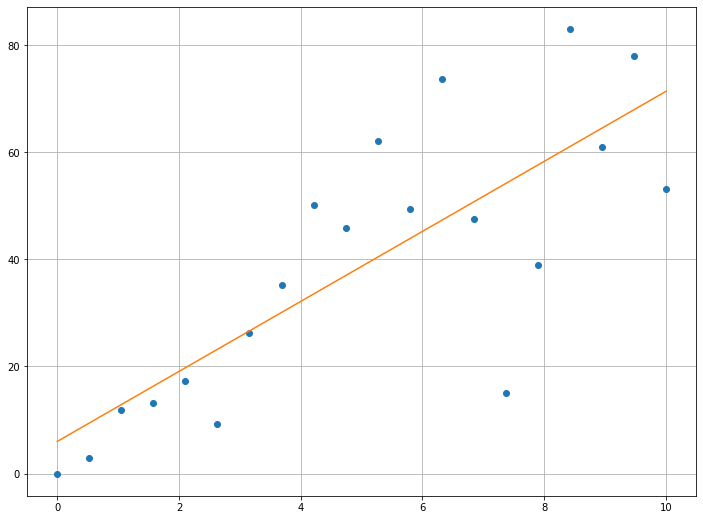

In [24]:
xx = np.linspace(0,10,20)
yy = np.random.normal(2,0.5,20)

yy = yy*(xx*4)

beta = (len(xx)*sum(xx*yy) - (sum(xx) * sum(yy)))  /  (len(xx)*sum(xx**2) - sum(xx)**2)

intercept  = (sum(yy)*sum(xx**2) - sum(xx)*sum(xx*yy))/(len(xx)*sum(xx**2) - sum(xx)**2)

plt.plot(xx, yy, "o")
plt.grid()

plt.plot(xx, intercept + beta*xx)

In terms of data analysis, we can let:

$y$ be the response value

$x_1$ be a predictor (attribute) of the data. 

We assume a matrix with $n$ data points and $m$ predictors, and from linear regression derive a set of coefficients of the form:

$y = a_0 + a_1x_1 + \ldots + a_mx_m$

This can be written more succinctly as:

$y_i = a_0 + \sum_{j=1}^m a_j x_j$

Thus showing how we derive a response for each data point i, by summing the intercept with the product of each predictor (attribute value) times its relevant coefficient for that dimension (attribute column).

The quality of a regression line is measured in terms of its $RSS$ i.e. the sum of squared residuals (errors). It is given:

$RSS = \sum_{i=1}^n(y_i - \hat{y}_i)^2$

Which is simply the sum of all differences between actual and predicted:

$RSS = \sum_{i=1}^n(actual_i - predicted_i)^2$

In long form: 

$RSS = \sum_{i=1}^n(y_i - (a_0 + a_1x_1 + \ldots + a_mx_m))^2$

Or: 

$RSS = \sum_{i=1}^n(y_i - (a_0 + \sum_{j=1}^m a_j x_j))^2$

In [25]:
RSS = 0

for x,actual in zip(xx, yy):
    
    predicted = intercept + beta*x
    
    residual = actual - predicted
    
    RSS += residual**2
    
print(f"RSS is: {RSS}")

RSS is: 4680.681684954456


#### Maximum Likelihood and Information Criteria ####

**Maximum likelihood** is a measure of how well a model has been **fit to a dataset**.

It makes the assumptions that:

1. The observed data is correct
2. We can know information about the variance based on our dataset (or some other source)

Using this information, we can actually retrospectively quantitify how likely would model would be to predict what was actually observed. This makes it a **joint probability** problem across all observations and predictions.

Let us assume that:

1. $\mu = 0$
2. Variance = $\sigma^2$ (this can be anything, but it must be something)
3. The observations are independent (i.e. not time series data)

Let:

$z_i$ be the set of observations.  
$y_i$ be the set of responses of our model.

We want to know the probability of observing $z_i$ (actual) if $y_i$ (predicted) is correct. The probability density for a single observation is thus given:

$Prob Density = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(z_i - y_i)^2}{2\sigma^2}}$

The joint probability over all observations is therefore the product across all observation-response pairs:

$\prod_{i=1}^n \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(z_i - y_i)^2}{2\sigma^2}}$

This is often rewritten as:

$(\frac{1}{\sigma \sqrt{2\pi}})^n e^{-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (z_i - y_i)^2}$

Our end goal for optimisation is thus: 

$\max \{(\frac{1}{\sigma \sqrt{2\pi}})^n e^{-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (z_i - y_i)^2}\}$

This results in:

$\min \{ \sum_{i=1}^n (z_i - y_i)^2 \}$

Namely, the smallest possible RSS.

So the fit that **minimises that RSS** is the **maximum likelihood fit**.

We can compare the RSS of two models resulting in a **likelihood ratio**, which we can then do a **hypothesis test** on.

#### Akaike Information Criterion (AIC) ####

This is a further test for the fit of a model, which is somewhat more complex. 

The purpose of this model is to **balance likelihood with simplicity** (preventing overfit).

Let:

$L*$ be the maximum likelihood value (as calculated above)

$k$ be the number of parameters being estimated 

$AIC = 2k - 2 \ln{L*}$

$2k$ thus acts a penalty term to prevent overfitting.

In long form we could write this as:

$AIC = 2(m + 1) - 2 \ln{((\frac{1}{\sigma \sqrt{2\pi}})^n e^{-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (z_i - y_i)^2})}$

The **smaller the AIC**, the **better the fit**, according to this metric.

The AIC has excellent properities if we assume an infinite number of data points. However, this never happens in reality, which is why there is a **corrected AIC** for use with smaller datasets.

$AIC_c = AIC + \frac{2k(k+1)}{n-k-1}$

Moreover, we can use AIC to compare models to give us the relative likelihood:

Relative Likelihood $= e^{\frac{AIC_1-AIC_2}{2}}$

Thus we if assume:

Model 1: $AIC_1$ = 75  

Model 2: $AIC_2$ = 80

In [26]:
e = np.exp(1)

e**((75-80)/2)

0.0820849986238988

The above tells us that Model 2 only has a 8.21% chance of being better than Model 1, thus the metric suggests we should use model 1.  

#### Baynesian Information Criterion (BIC) ####

Much like AIC, **BIC pushes the model towards even fewer parameters**. However, **BIC is even more ruthless than AIC** in this respect and demands even fewer parameters.

It should only be used when there are far more parameters than data points. 

$BIC = k \ln{(n)} - 2 \ln{(L*)}$

where $L*$ is the **maximum likelihood** (as calculated above).

The key difference between this and AIC is that the penalty terms scales with **both number of data points and number of parameters**.

As a general rule:

$|BIC_1 - BIC_2| > 10 \rightarrow$ smaller-BIC model very likely better  
$6 < |BIC_1 - BIC_2| < 10 \rightarrow$ smaller-BIC model likely better  
$2 < |BIC_1 - BIC_2| < 6 \rightarrow$ smaller-BIC model somewhat likely better  
$0 < |BIC_1 - BIC_2| < 2 \rightarrow$ smaller-BIC model only slightly likely better

AIC is a frequentist model vs BIC is a Baynesian model, so it comes down a philosophical debate about statistics!

Some additional points:

- Regression is not good for answering prescriptive questions about the best way to do something

- Always remember that correlation does not equate to causation (whatever that is when it's at home)

- Linear regression is not used for probability

- Using all three: max likelihood, AIC, and BIC, is generally a good approach.

#### Transformations ####

So what if we have something like this? 

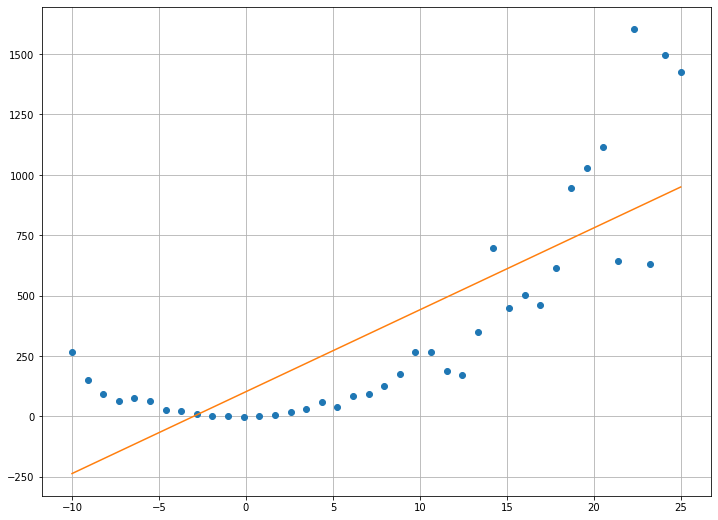

In [27]:
xx = np.linspace(-10,25,40)
yy = np.random.normal(2,0.5,40)

yy = yy*(xx + xx**2)

beta = (len(xx)*sum(xx*yy) - (sum(xx) * sum(yy)))  /  (len(xx)*sum(xx**2) - sum(xx)**2)

intercept  = (sum(yy)*sum(xx**2) - sum(xx)*sum(xx*yy))/(len(xx)*sum(xx**2) - sum(xx)**2)

plt.plot(xx, yy, "o")
plt.grid()

plt.plot(xx, intercept + beta*xx)

Above we clearly see some kind of curve. But how can this work with linear regression? One solution is transformation. For example quadratic regression:

$y = a_0 + a_1x_1 + a_2x_1^2$

Note that we have used the $a_1$ term twice in the regression line!

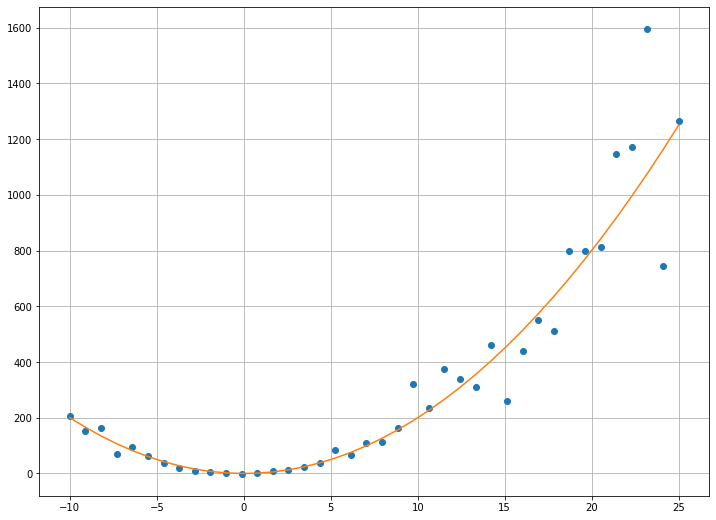

In [28]:
xx = np.linspace(-10,25,40)
yy = np.random.normal(2,0.5,40)

yy = yy*(xx + xx**2)

beta = (len(xx)*sum(xx*yy) - (sum(xx) * sum(yy)))  /  (len(xx)*sum(xx**2) - sum(xx)**2)

intercept  = (sum(yy)*sum(xx**2) - sum(xx)*sum(xx*yy))/(len(xx)*sum(xx**2) - sum(xx)**2)

plt.plot(xx, yy, "o")
plt.grid()

plt.plot(xx, 2*xx**2)

Obviously something like the above is preferable to a linear fit here! 

Another common transformation is to perform a log transformation on the response vector:

$\ln(y) = a_0 + a_1x_1 + \ldots + a_mx_m$

Sometimes we will transform both the predictors and the response vector. 

Another common transformation is the Box-Cox transformation.

Box-Cox is a means of **standardising the variance** across a dateset when the variance is uneven.

A final, and different, example of transformation is an **interaction term**.

Let:

$x_1$ be a predictor of a child's future height e.g. father's height

$x_2$ be another predictor of a child's future height e.g. mother's height

We might find that the term:

$x_3 = x_1x_2$

Namely, $x_3$ the product of the two predictors, is a more useful predictor for our regression analysis than either is independently.

#### Interpreting Output ####

Some common metrics for the interpretation of regression models are:

1) **p-values** for each coefficient i.e. the probability of achieving the same result assuming the null-hypothesis to be true. WARNING: because data scientists often work with giant data sets, this can generate low p-values even for factors that are not actually useful in the regression analysis. Moreover, p-values are probabilities, so if we have 100 attributes with low p-values, we can assume that at least 2 are actually irrelevant and the low value is a due to random effects.

2) **Confidence interval**: the probability of values falling within a specified range around the mean based on the p-value (typically 95% confidence interval)

3) **T-statistic**: the coefficient divided by the standard error (similar import as p-value)

4) **Coefficient**: Note that coefficients close to 0 are useless, so looking at the coefficients is useful too. The scale of the coefficient is relative to the scale of the input data, so with higher orders of magnitude being input, lower values e.g. 1,2 etc. become less relevant.

5) **R-squared value** (coefficient of determination). This estimates the quantity of variation that the model accounts for and is highly useful!

$R^2 = 1 - \frac{RSS}{TSS}$

where:

$RSS$ = sum of squared residuals 

$TSS$ = total sum of squared 

$TSS = \sum_{i=1}^n (y_i - \bar{y})^2$

Where $\bar{y}$ is the mean of the observed values.

And R-squared value of 0.6 would then indicate that the model accounts for 60% of the model's variance. Be careful, while higher is typically better, it can also indicate overfitting!

There is also a metric called the **adjusted-R-squared value** which attempts to account for the number of attributes used in the regression and is generally more reliable.

Note that modelling is hard, and sometimes an R-squared value of 0.3 or 0.4 is actually pretty good!

#### Advanced Data Preparation (week 6)####

Here we go into more depth about the **Box-Cox transformation**

If $\lambda \neq 0$:

$Y_t^{(\lambda)} = \frac{(Y)^\lambda - 1}{\lambda}$

Else:

$Y_t^{(\lambda)} = \ln{(Y)}$

It is useful when we are dealing with **heteroskedasticity** i.e. **uneven variance**.

It is a **logarithmic transformation** that essentially:

1. Stretches the smaller range to increase variance

2. Shrinks the wider range to decrease variance

Ultimately the goal is to find the optimal value of $\lambda$ to achieve as close to a normal distribution as possible. 

This can be stated:

Find $\lambda$ such that $t(y)$ is as close to normal as possible.

$t(y) = \frac{(y^\lambda - 1)}{\lambda}$

A useful tool for analysing variance for data preparation is the use of a **Quartile-Quartile plot** (Q-Q plot).

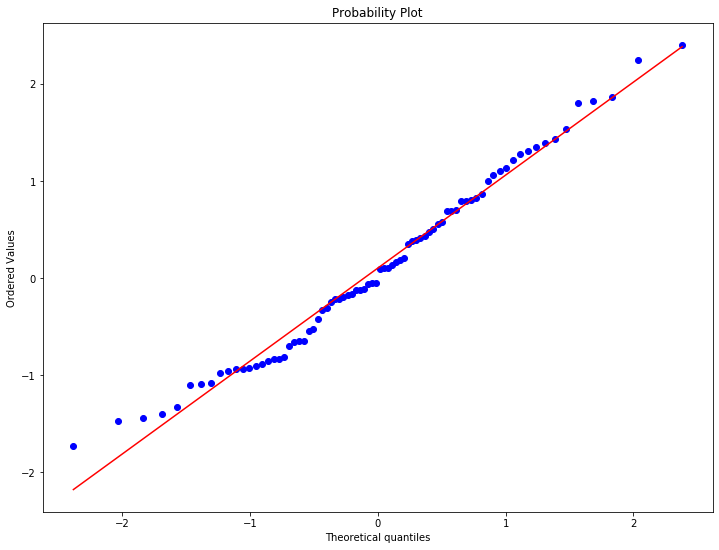

In [29]:
import scipy as sp
from scipy import stats

yy = np.random.normal(0,1,80)

sp.stats.probplot(yy, dist="norm", plot=plt)
plt.show()

The fact that the data points broadly follow the line shown indicates that the data is pretty normally distributed. 

#### Detrending ####

Trend is increase or decrease over time. But what if we want to **remove the effects of trend** in our analysis?

This is usually done on **time series data**.

For example, we might want to remove the impact of inflation from a data set showing the value of gold. This is because the inflation trends would **break our analysis** making our predictions wildly inaccurate. 

In some cases, we might have **real world data** that we can use to achieved a fine-tuned detrending of the data, but sometimes this is not possible.

When we don't have such data, we can use **linear regression** to adjust for the trend. 

For example, our analysis might determine that:

Gold Price = $-45,600 + 23.2(year)$

Thus the detrended price would be:

Detrended Price = Actual Price $-(-45,600 + 23.2(year))$

So to summarise, our options are:

Detrended = $Actual Price - Trend Line$

OR

Detrended = $Actual Price - Actual Trend Data$

This model is simple and useful for **time series** data and **factor-based** analysis.

It is worth noting that **both predictors and responses can be detrended**.

#### Principal Component Analysis #### 

PCA is a form of **feature extraction** and, if we want it to be, **dimensionality reduction**. Sometimes we simply have too many predictors/factors and need to simplify. 

PCA is very good at **merging correlated predictors/factors** into new data that has fewer dimensions and still captures everything of worth within those correlated factors. 

It can also be used to **prevent overfit** when we simply have **too many attributes**. 

In short it deals with:

1. Too many predictors
2. Too many correlated predictors 

It does this by:

1. Changing coordinates to remove correlation
2. Ranking new coordinate dimensions in terms of the quantity of variance they explain (i.e. how important they are)

The consequence of this is that it:

1. Reduces the impact of random variation
2. Orders the princpal components in terms of their signal-to-noise ratio

The end result is that the more highly ranked principal components are more likely to be driven by actual effects rather than random effects. 

#### PCA method ####

Let $X$ be the initial matrix of data such that:

$x_{ij}$ is the value of the jth attribute for the ith data point.

First we scale the matrix such that the mean of each column is 0:

$\frac{\sum_i^m x_{ij}}{m}  = 0 = \mu_j$

(This means that for we sum all the values in column j, and divide by the number of rows in the column. This value must equal 0, which it to say that the mean for the column must be 0. This is accomplished by scaling as covered earlier. It assumes we have a finite set of data and that we know the range.)

Now we find all the **eigenvectors** of the square matrix $X^TX$

This set of eigenvectors creates a matrix $V$, its content is:

$V = ( V_1, V_2, \ldots, V_? )$

$V_j$ will thus be the eigenvector of the jth principal component.

In theory we have the same number of eigenvectors as rows in $X^TX$

Note: for every eigenvector we also have an **eigenvalue** ($\lambda$) resulting in a single vector of eigenvalues (one for every eigenvector) such that:

$\det{(X^TX - \lambda I)}$ = 0

and 

$X^TXV = \lambda V$

The next step is the **linear transformation** whereby we multiply each vector by $X$:

$\{XV_1, XV_2, XV_2, etc.\}$

The actual values for each principal component $k$, which should be the same shape as the initial $X$, can be found:

$t_{ik} = \sum_{j=1}^m x_{ij} v_{jk}$

If our goal is simply to remove correlation from the dataset, we can use all the principal components.

HOWEVER, if we wish to decrease dimensionality, we need to throw away from of the less important (less variance explaining) principal components before we reconstruct the matrix.

This, of coures, results in some information being lost, the reconstructed values being a less accurate copy of the original. However, because the explanation of the variance is not evenly distributed among the principal components, we can throw away a lot of data before we have too serious an impact on the reconstruction. 

This is why PCA is the theory that lies behind a lot of data compression technology e.g. image compression. 

Note: this is a linear transformation example. However, through the magic of kernels, many non-linear, and even more remarkable transformations are possible.



#### Interpretation ####

This was horribly explained in the lecture and then heavily required for the homework, so let's just get it over with.

OK let's imagine we throw away some eigenvectors because they don't explain much variance, and are probably random static. 

We take say five pcas from twelve. We can now run regression on these pcas, get some coefficients, and this will work as a blackbox predictor for whatever it was that we were doing regression for.

However, we'll also need to convert any new data that we want to make predictions for in the same way! We only have five coefficients. Let's call them **PCA coefficients** sinces they're trained on principal components. So we need to run PCA on the new data and then use their first five principal component values from that analysis as input. 

Well that's inefficient, but what we can do is just reconstruct the matrix and then run regression on that, but that's not ideal. 

Actually we can do it with maths. Let:

$L$ be the number of principal components we retained in our analysis.

$b_0$ be the intercept from that analysis.

$(b_1, b_2, b_3, etc.)$ be the coefficients from runnning regression on the principal components.

$t_{ik} = \sum_{j=1}^m x_{ij} v_{jk}$

$y_i = b_0 + \sum_{k=1}^L b_k (t_{ik})$

$y_i = b_0 + \sum_{k=1}^L b_k (\sum_{j=1}^m x_{ij} v_{jk})$

$y_i = b_0 + \sum_{j=1}^L x_{ij} (\sum_{k=1}^m b_k v_{jk})$

$a_j = \sum_{k=1}^m b_k v_{jk}$

where $a_j$ is the coefficient in terms of the original factors.

However, we also need to scale the coefficients by dividing by the standard deviation from the initial columns.

And descale the intercept by subtracting from it the sum of the non-descaled coefficients vector multiplied by the vector of mean values for each column, over the standard deviations from the initial columns. Oy vey. 

descaled coeffs = coeffs/std

descaled intercept = intercept - sum((coeffs x mean)/std)

In [30]:
matrix = np.random.normal(0, 3, (10,10))

square = matrix.dot(matrix)

eigenvalues, eigenvectors = np.linalg.eig(square)

print(eigenvalues.shape)
print(eigenvectors.shape)
pca = matrix.dot(eigenvectors)
print(pca.shape)

(10,)
(10, 10)
(10, 10)


#### Advanced Regression (Week 7) ####

This will particularly focus on CART analysis.

**CART** = **Classification and Regression Tree Analysis** 

Obviously, this approach works for both classification and regression.

It essentially involves running a regression or classification model multiple times, and then using this information to make decisions about when to **"split" the analysis**, such that we end up with different models for different partitions of the data. 

For example, we might find that, instead of running regression on our whole dataset, (imagine it's customer data for marketing purposes), it makes more sense to split the dataset on the basis of the age of the customer, and then create two separate regression models for a much better result.

CART essentially checks for opportunities these kinds of split and decides when it's worth splitting the data and building new models. 

We are not limited in terms of the number of splits either, but at some point it won't bring any value to the overall model.

Each model within the model, is a leaf i.e. a terminal node. Each split in the data is a branch. The initial analysis on the complete dataset given to the model is the root. 

In the case of regression, the result will be a set of coefficients for each terminal leaf in our "tree" for use on an identified segment of our dataset (e.g. over 35s).

These split decisions can have explanatory power too, so that is another value of the approach. We might find that different attributes are more important to different demographics for example.

We can also evaluate each terminal node ("leaf") model as we would any model e.g. using $R^2$ values. This can give us information on where our model is wrong and weak. 

If some leaf nodes are too weak, we could consider **pruning** the tree by rerunning the model without that particular branch (i.e. split) in the tree. 

As well as classification and regression, these models are sometimes used in decision-making, in which case they are called **decision trees**. 



#### Branching ####

Two important questions here are:

1. How do we specify when to branch?
2. When do we stop branching? 

So we might ask further:

- Which factors should be used in the branching decision?
- How should the data be split? 

We can, in theory, branch on any combination of factors however we wish to do it. Sadly, there is no single best way to do it.

Standard practice is thus:

1. Build regression model on 50% of data.
2. For every node, calculate the variance of the response on all data points in the data subset.
3. Test splitting on each factor considered for branching (possibly all) and see which one results in the biggest variance decrease. Split on the factor that yields the biggest decrease provided it is significant enough to be worth it according to some threshold.
4. Stop splitting when no further split yields a variance decrease that exceeds the threshold. 
5. Do the process in reverse, starting with the full tree, then removing nodes, using the other 50% of the data and make error calculations for the model both with and without the splits. If the split appears to increase error, prune it. 

This is just one solution. However, all solutions are similar in that they:

1) Use some metric to measure quality  
2) Identify the best factor to branch on  
3) Test with more data afterwards to see if it really was worth branching and adapt by pruning if it wasn't worth it.

The conditions for rejecting a branch are actually twofold:

1) obviously, lack of benefit to model (branch increases error)  
2) insufficient data points in subset (heuristic: must be greater than 5% of data points)

Too much branching will lead to overfit.



#### Random Forests ####

A random forest approach to CART is a brute force way of building a model. 

It **compromises explanatory force with better prediction**. 

Unlike with the standard CART, we don't often know why it works well because we simply generate hundreds of trees (500-1000) and then use the overall average from all of them.  

Randomness is introcuced as follows:

1. Each tree in the forest is given a random selection of data. It is given the same number of data points as included in the provided dataset. However, it is sampled with replacement, meaning some data points appear multiple times and some none at all. This is sometimes called a **bootstrapping process**. 

2. Every time each tree in the forest splits, it does not choose from the full set of factors, but rather a randomly selected subset of factors (1 + ln(n) is commonly used).

3. Trees are not pruned. 

Then we just use the average of running our values through all trees to get our prediction.

If we are doing classification (e.g. logistic regression based classification), we take the most common output i.e. the median of each tree's invidiual response. 

**Advantages**

- Better estimates overall
- Average response tends to neutralise overfit

**Drawbacks**

- Less explanatory power
- Can't yield one specific model for the data

Random forests are often used as the default for regression problems since they are the best predictors and typically that is what matters (but not always!).

#### Logistic Regression #### 

With regression so far, the output of the model i.e. the response vector, has been a set of continuous values. However, this is **not the case for logistic regression**. Logistic regression is better for **binary factors**.

The **output will instead be a probability** between 0 and 1 e.g. probability a loan will be repaid. 

This can be converted into a label easily through the magic of rounding (and thresholds), so logistic regession is also used in classification.

The model is:

$ p = \frac{1}{1+e^{-(a_0 + a_1x_1 + \ldots + a_jx_j)}} $

As you can see, it involve the same term we would use in linear regression. 

The coefficient sum could be retrieved with:

$ \ln{(\frac{p}{1-p})} = a_0 + a_1x_1 + \ldots + a_jx_j $

It follows that:

$a_0 + a_1x_1 + \ldots + a_jx_j = \infty \rightarrow p = 1$ 

$a_0 + a_1x_1 + \ldots + a_jx_j = -\infty \rightarrow p = 0$ 

So don't expect any exact ones or zeros! 

The **logistic curve** is what allows us to convert to probabilities so readily. This is also known as the **sigmoid curve**, given:

$f(x) = \frac{L}{1+e^{-k(x-x_0)}}$

Where:

$x_0$ is the position of the sigmoid curve's midpoint (y = max value / 2) on the x-axis  
$L$ is the max value of the curve (i.e. the height)  
$k$ is the **logistic growth rate** (i.e. the steepness of the curve)  

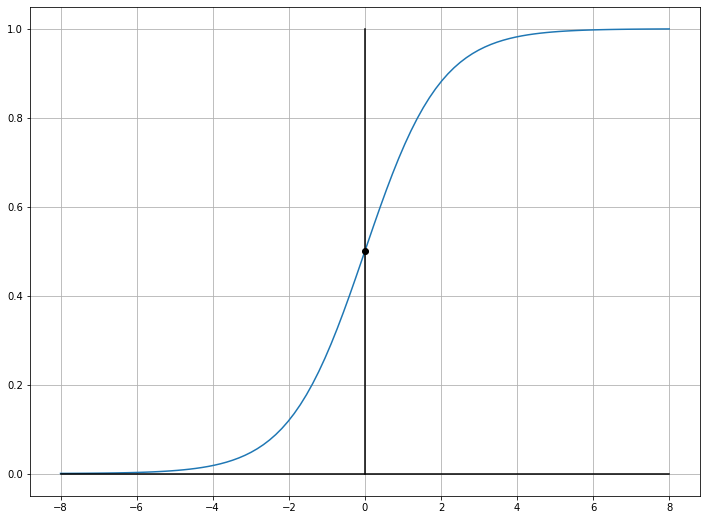

In [31]:
maxval = 1
k = 1
mid = 0

xx = np.linspace(-8, 8, 100)
yy = maxval/(1+np.exp(1)**((-k)*(xx - mid))) 

plt.plot(xx,yy)
plt.plot((0,0), (0,maxval), "k-")
plt.plot((-8,8), (0,0), "k-")
plt.plot(0, 0.5, "ko")
plt.grid()

**Logististic vs Linear regression:**

**Similarities**

- the input data can be **transformed** before use
- **interaction terms** can be used with both
- **variable selection/elimination** is possible
- regression trees (aka **CART**) can be used
- like linear, **random forest** is possible with logistic regression 

**Differences**

- logistic takes **more time** and computation
- logistic has **no closed form solution**
- **evaluation** must be handled differently

For an example with evaluation, there is **no R-squared** for logistic regression. However, much software has a **pseudo-R-squared** value.  

As for classification, we can set a threshold and label on the basis of probability, which is nice for binary classification.

#### Choosing a threshold for classification ####

The a popular way to do this is with **Receiver Operation Characteristic (ROC)** Curve.

The ROC shows **sensitivity** (rate of true positives) on one axis and 1-**specificity** (rate of true negatives) on the other.

As we change the threshold, the classifier will start to move towards one of these extremes because it will become either too positive or too negative in its predictive power. 

By measuring the **Area Under the Curve (AUC)** we can quantify which threshold gives us the best overall prediction balancing both of those considerations. 

Note that an AUC of 0.5 means your predictions are as good as a random number generator. 

The ROC alone cannot be used to bias decisions towards one way or another due to some other priority e.g. costly false negatives but inexpensive false positives, while also trying to maintain accuracy. That you need a...



#### Confusion Matrix ####

What a shit show of confusion this is! 

Note: Confusion Matricies are used for **classification models only** e.g. SVM, KNN, Logistic Regression (and other probabilistic approaches). 

I'll just say:

TP|FN
---------
FP|TN
---------

TP & FN were the deal deal

FP & TN were the fakes

TP & FP got bought

FN & TN got rejected

P means our model bought it

N means our model rejected it

T & F refer to whether the model was right or not.

$Sensitivity = \frac{TP}{TP+FN}$

Sensitivity is a measure of real deal detection.

$Specificity = \frac{TN}{FP + TN}$

Specificity is a measure of fake goods aversion.

$Precision = \frac{TP}{TP+FP}$

Precision tells us if a sensitive person is really just stupid and buying everything, thus never missing the real deal.

$False Omission = \frac{FN}{TN+FN}$

False Omission tells us if a specific person is just scared of their shadow and not buying anything, thus never buys a lemon.

#### Situational Comparison ####

Sometimes we need to weight our model to be more cautious or more avaricious. 

Imagine we were diagnosing patients. This would make a false negative much worse than a false positive, since that person could get very sick. 

However, as an inverse case, we might filtering spam. The cost of a false negative is not that high, someone gets some spam in their inbox, but a false negative would be much worse since an important email could be missed. 

If we have real information about the cost of various outcomes, it's very easy to make a cost matrix to quantify this and then optimise it. 

With spam:

TP (good message goes to inbox): £0.00  
FP (spam goes to inbox): £0.20  
TN (spam goes to bin): £0.00  
FN (good message goes to spam): £1.25  

Thus:

$Cost = 0(TP) + 0.2(FP) + 0(TN) + 1.25(FN)$

Note that this assumes that the data on which we trained the model is representative of the real ratio of good mail to spam.

We could adjust it like this: 

$Cost = 0(TP)(0.6) + 0.2(FP)(0.4) + 0(TN)(0.4) + 1.25(FN)(0.6)$

This would be if we suspected that real ration was 6:4 in favour of real email when compared to our model. 

#### Advanced Regression ####

We can split regression methods broadly into two kinds:

- Parametric methods: these involved fixed parameters
- Non-parametric methods: no fixed parameters

One kind that should be dealt with is **Poisson regression**, which is a parametric method.

The Poisson distribution is useful for all kinds of things e.g. counting the number of arrivals at a security line.

It is given:

$f(k) = \frac{\lambda^ke^{-\lambda}}{k!}$

Where:

k = number of occurences  
$\lambda$ = parameter

f(k) = probability of that number of arrivals

We assume $\lambda$ is a function of other attributes e.g. day of the week, or time of day

Poisson regression can thus be used to find $\lambda$ and make predictions about the number of arrivals at a certain time of day.

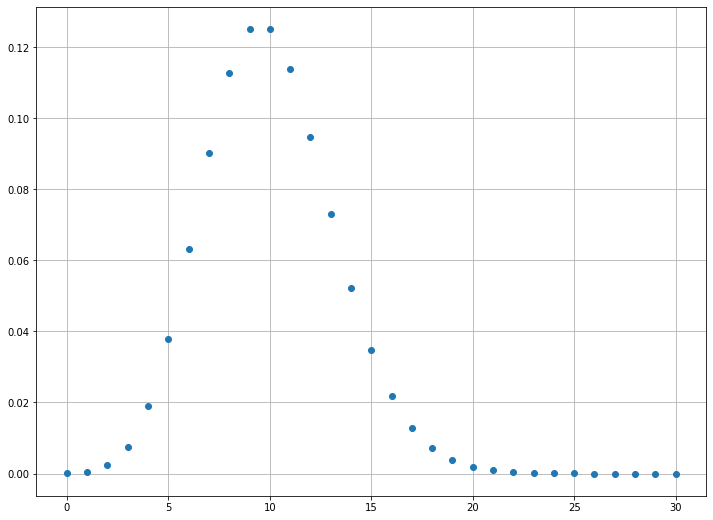

In [32]:
size = 30

xx = np.linspace(0, size, size+1)
lmda = 10
k = 10
yy = []

for _ in xx:
    
    yy.append(((lmda**_)*np.exp(1)**(-lmda))/np.math.factorial(_))
    
plt.plot(xx,yy, "o")
plt.grid()
plt.show()

Another kind of advanced regression method is the use of **regression splines**, which are essentially a sequence of connected polynomial, each spline having its own polynomial to describe its curve. 

A regression curve consisting of k polynomials i.e. k curved segments, could be described as a k-order regression spline.

Here the number of the splines used is a parameter, making this a parametric method. 

One famous model along these lines is the **Multi-Adaptive Regression Splines** model, known as **MARS**. (sometimes known as **EARTH** due to copyright reasons). 

One constrain on this model is that the piecewise function of polynomials must remain smooth and continuous.

**Baynesian regression** is another model that is important to be familiar with. Its advantage is that it works well when data is limited and can have its parameters informed by an expert assessment of the situation yielding an **inferential estimate** of both the likely regression coefficients and the distribution of random error in the data set. 

In regression for medical purposes, we might use the input of medical professionals on what the answer is likely to be to inform our model. 

As new data comes in, Baynesian methods allow us to update our expected distribution as we progress.

Finally, **KNN regression** is an incredibly simple regression model that allows us to use existing data points to estimate some value. We essentially just take our response from the nearest known value by measuring the distance in how ever many dimensions. This is technically regression although we only use math to measure distance from the nearest point.

#### Variable Selection (Week 8) ####

Thus far we have covered many factor-based methods such as:

- Classification
- Clustering 
- Regression

However, in some cases we may wish to remove factors from the model, which involves **variable selection** whereby we eliminate less useful factors from the model.

The benefits of removing factors are manifold:

1) It **avoids overfitting**. Too many factors can result in too much fitting to random variance across so many factors. This is especially the case when we have only a limited number of data points. The more factors, the more data points are required (e.g. 10 + 10 rule)

2) It **increases simplicity**. Simple is generally good. Data collection is expensive. Fewer factors means less chance of collecting irrelevant data. Even if all factors have a p-value < 0.05, with 20 factors, it's still likely that at least one will be just random variance and irrelevant (64% chance!). Moreover, simplicity can increase explanatory power to non-analysts.

Note: in some cases, it might even be illegal to use certain factors, e.g. gender, race, and in some cases other factors may be highly correlated with such factors. 

#### Models for variable selection ####

Various models can perform variable selection:

**Forward Selection** is a method whereby the best factor is identified and its effiacy is checked (e.g. by its p-value), typically with a relatively forgiving criteron. If it passes the test, it is added to the model. This is repeated until the specified limit for the number of factors is reached or there remain no factors that pass our test. We then fit the model. A process of **pruning** is then engaged in to test the p-value of the factors again. If a factor fails this second (more stringent) test, then it is removed i.e. pruned. 

**Backwards Elimination** is the reverse of forward selection. In this case, we look for the worst factor with the highest p-value and eliminate it, repeating the process until only good enough factors remain (or a specified limit is reached). Once we have our factors, we fit the model, and then once again prune the tree before deriving our final model.

A combination of these approaches is called **Stepwise Regression**. We test the best factor, if it passes we add it to the model and then fit. We then remove any bad factors by testing each factor. If we don't have enough, we repeat the process by adding the next best factor, else we engage in a final pruning and derive our final model. This takes longer since we fit the model at each stage.

Alternative metrics for the quality of factor other than p-values exist. $R^2$, Maximum Likelihood, AIC, and BIC are all possible (or a combination of these). 

These are all known as **greedy models** since we make an assessment of the model at each step of the process. They are also **classical methods** that have been around for a long time. More modern approaches tend to look at the problem more globally. 

One such more modern method is known as **LASSO regression**. This involves some slight alteration of the standard regression model. It can be expressed thus:

$\min(\sum_{i=1}^n (y_i - (a_0 + a_1x_1 + \ldots + a_jx_j))^2$)

subject to: $\sum_{i=1}^j |a_i| \leq \tau$

Where: $\tau$ is essentially a "budget" for the algorithm to spend on coefficients.

Note: this requires scaling since otherwise we'll have different orders of magnitude biasing the budget spend across the coefficients.

So essentially, we are saying "minimise the square error" but only provided the total sum of coefficients is small (below $\tau$). Thus we force the coefficients to be smaller than they might be under a standard regression model. One benefit of this is that the model may **ignore correlated factors** in order to "save budget", increasing the model's simplicity. The model is incentivised to spend budget only on factors that really make a difference, which can avoid overfit.

An interesting contrast to this model is something called **Ridge Regression**, which works on a similar principle but introduces **a squared term** to the constraint. 

$\min(\sum_{i=1}^n (y_i - (a_0 + a_1x_1 + \ldots + a_jx_j))^2$)

subject to: $\sum_{i=1}^j (a_i)^2 \leq \tau$

Thus now, we want to minimise the square error but at the same time, spending all the budget on just a few coefficients is penalised since large values for the coefficients are penalised more heavily, based on an exponential curve. This incentivises the model to spread its spend across multiple factors. This means it is **not technically a form of variable selection** since is actually increases the chances of more variables being included in the model. 

It is also worth noting that Ridge regression can introduce some degree of bias to the model e.g. if just a few predictors are, in fact, the best option, it will still select more to avoid exceeding the budget.

The **Elastic Net** is a parametric method of variable selection that allows us to compromise between these two opposing forces with a specified value: 

$\min(\sum_{i=1}^n (y_i - (a_0 + a_1x_1 + \ldots + a_jx_j))^2$)

subject to: $\lambda\sum_{i=1}^j |a_i| + (1-\lambda)\sum_{i=1}^j (a_i)^2 \leq \tau$

Where: $\lambda \in [0, 1]$

Thus, by setting our value between 0 and 1, we can choose how much to push our results toward minimising the number of factors or spreading the coefficient budget between multiple factors. 

If $\lambda = 1$ we have LASSO regression, while if $\lambda = 0$ we have Ridge regression.

More generally speaking, we can say that **Prediction Error** is a **product of both bias and variance**. Elastic Net is essentially a **trade off between bias and variance**. 

The downsides of Elastic Net are that it both:

1) Arbitrary eliminates some correlated factors, which may be informative (LASSO effect). Less bias but more variance.  
2) Underestimates the best coefficients and spreads the budget (Ridge effect). Reduces variance but increases bias.

Note: the spreading of coeffs due to the Ridge effect can also increase the cost of data collection due to more factors.

Generally speaking, **forwards, backwards, and stepwise regression** are quicker and **good for initial exploration**, but tend to **overfit**.

**LASSO and Elastic Net** are better but **slower**, and good for a **final model**.


#### Design of experiments (week 9) ####

The design of experiments of experiments is related to **data collection**. It often involves deciding how to collect data **most efficiently** in order to answer a specified research question.

USE CASE:

1) Choosing between two competing banner ads.

2) Choosing which alternative, related products to display to the user of an online shop to maximise the chance of a sale.

3) Selecting a representative sample for a survey.

One important concept here is **comparison and control**. We have to control for other factors when doing the experiment to ensure a legitimate comparison. 

Another important concept is **blocking**. A **blocking factor** is something that could cause variation. For example, if we are comparing different coloured sports cars, we will find that sports cars are disproportionately red-coloured when compared to other types of vehicle. 

#### A/B Testing ####

A/B testing is one of the simplest forms of experimental design. It allows us to decide between two competing options in an experimental test e.g. which of two different banner ads to use to market our product. 

Imagine we have two different banner ads and we find the following results across 2000 servings of the ad:

Ad|Clicks|Serves|%
-------|-------|--------|------
A|46|1003|5%
B|97|997|10%


This would suggest that ad B is better; however, this would be harder to establish if the difference in click-thru rate were less pronounced. 

One more cost-efficient method is to do similar testing but in a dynamic way i.e. adapting what we're doing as data comes in.

A/B testing is typically used when:

1) We can collect data quickly  
2) We know the data is representative (the sample is good and represents the population)  
3) The amount of data needed is small relative to the population (normal conditions, costs)

A/B is, of course, only used for choosing between two options. What do we do if we have many options?


#### Factorial Designs ####

Factorial design involves testing multiple combinations of factors to determine which combination is the most effective in some respect. When **all possible combinations** are used it is known a **full factorial design**. 

An **ANOVA** analysis is used to determine the importance of each factor. 

ANOVA = Analysis of variance 

Assumptions: independence, normal, homosketastic 

Objective: Test the null hypothesis for $\geq 3$ populations, which assumes that the means are equal.

$H_0: \mu_1 = \mu_2 = \mu_3 = \ldots = \mu_k$

The number of combinations possible increases on an exponential scales. For example with 7 factors each with 3 options we get $3^7 = 2187$ combinations. 

When the number of combinations is too high, we can use **fractional factorial design**, selecting only those factors that maximise our insight into their efficiacy. This is usually fine when we assume that the effects of factors only influence the outcome independently and don't interact too much. In this case, only the individual impact of each option matters. 

However, sometimes this is hard to know. We might, for example, establish that yellow is the best text colour and white is the best background colour for a banner ad, but when we combine them, we find the click-thru rate plummets because users can't read the text. So be careful.

A fractional factorial design will most likely test some combinations, but obviously won't test all. Given three options for each factor, we might, for example, test all pairing but not all triplets. 

Software can be used to find the optimal combination of options for each factor to give us as much information about interactions as possible. 

Another option, if we can assume the independence of each factor, is to test a subset, and then use regression to predict the interaction of other factors. 

If we think some factors will interact and others won't, we can introduce interaction terms to our regression model to test these interactions e.g. background colour x font colour.

Another tool here is called **surface response methodology**. This involves using a fractional factorial design to determine the explanatory variables that effect the response, and then using a **central composite design** to estimate a 2nd degree polynomial model.



#### Multi-Armed Bandit ####

The danger of a factorial design is that it can result in a loss of value. This is because sub-optimal combinations must be used many times until we can confidently establish which combination is best. 

There is a **trade off** between more information and confidence on one side, and immediate value on the other. 

This is sometimes known as:

**Exploration vs Exploitation**

Sometimes it is called the **multi-armed bandit problem**, from a thought experiment that asks us to establish the best of a set of one-armed bandits. We have to test them all before we can know which gives the best win-chance. 

We can take a more dynamic approach to this problem. 

Thus, we start with k alternatives, assume each one to have an equal win-chance, then after $\alpha$ iterations we update the probabilities and continue to do so after a set interval. 

We test each alternative with a frequency proportional to the probability value, meaning we get more information about those alternatives that seem promising, and less promising alternatives get tested less and less until the frequency of their testing is neglible. 

The result is that we minimise the loss of value and spend less time testing less promising alternatives. This approach is heuristic, as an early run of bad luck for a certain alternative can make it appear less promising than it actually is, and it will take a long time to recover since its testing will be less frequent, resulting in some loss of value, but this would arguably be less than an factorial approach since the more frequently tested alternatives won't be that bad. 

This is a **parametric method** and its parameters are:

- Number of tests between recalculating probabilities (i.e. length of interval between updates)
- How probabilities are calculated (Baynesian vs Frequentist approach)
- How to assign new tests (observed probabilities vs expected value)

The main benefits of this method are:

- Less loss in value
- Quicker than factorial design

The downsides are:

- Less confidence for all options



#### Probability-based models (week 9) ####

**Probability distributions** are essential tool in analytics are often underestimated.

They often offer simple solutions to seemingly complex analytics problems (and Sokol loves them, so expect them in the exam)

Some use cases:

- Security lane people flow
- Season ticket holder absenteeism
- Staffing and promotion plans for fast food chains

Sokol's personal example was that of a company that resold season-ticket-holder seats to people wanting to watch baseball games. The company needed to predict accurately how many seats they could safely resell while avoiding a situation where the actual seat-holder appeared and their customer was forced to move seat. The company kept a number of seats in reserve in case too many seats were resold, but naturally this cost money and they desire to minimise the number of reserve seats. 

The company also wished to begin the process of reselling the seat as soon as possible since this meant the customer was more satisified (they could arrive in the seat at a normal time before the game begins), and the chance of a successful resale was higher (more time to market the seat to potential customers). 

However, the trade-off here was that the earlier they sold the seat, the higher the chance that the season-ticket holder would arrive and demand their seat. 

Clearly, there are many approaches to solving the problem. We could look at vast amounts of data to build a predictive model (e.g. popularity of opponent team, importance of game, weather etc.), but, in fact, a simple solution was found to be most effective. 

It was found that:

- Season-ticket holder are most likely to arrive when 60% of the other attendees have arrived in the stadium.

- Season-ticket-holder attendance was correlated with the attendance rates of regular non-season-ticket fans, with deviations from this attendance rate following a normal distribution. 

This the problem could be elegantly solved by simply using one value: **real-time information about the number of fans entering the stadium**. With this number about general attendance, the company could use a normal distribution to predict the chances of a season-ticket holder arriving for their seat, and thus sell on this basis. With this probability, they could know exactly when the reward from resale outweighed the potential penalty of a late-arrival and having to reseat a customer. 

The moral of this tale is that very common distribution occur in the real world all the time, and these are very useful for modelling real world phenomena. Don't underestimate distribution!

#### Bernoulli, Binomial, and Geometric distributions ####

A **Bernoulli distribution** is the kind that we expect from flipping a coin one time, only we don't know whether the coin has a bias or not. It is essentially a **special kind of binomial distribution** that involves only **one trial**. It's **probability mass function** is:

$P(X=1) = p$  
$P(X=0) = 1 - p$  

Another example of such a distribution would be a charity sending out letters to its members asking for money. Imagine the charity sends a letter to 1/12 of its members every month. Assume that p does not change seasonally and all donations are the same size. 

Consequently, we would expect to see that the number of distributions is **binomially distributed**. This can be used to **test for seasonality** e.g. more donations before Christmas.

Probability of getting x successes from a set of independent identically distributed Bernoulli trials results in a binomial distribution. 

With enough trials i.e. a high value of n, then a binomial distribution converges on a normal distribution:

Probability mass function 2: 

$P(X=x) = \begin{pmatrix}
    n \\
    x \\
\end{pmatrix}p^x (1-p)^{n-x}$  

$P(X=x) = (\frac{n!}{(n-x)!x!})p^x(1-p)^{n-x}$

Note: This means that if n is large, we can just use the normal distribution since factorials take a long time to compute.



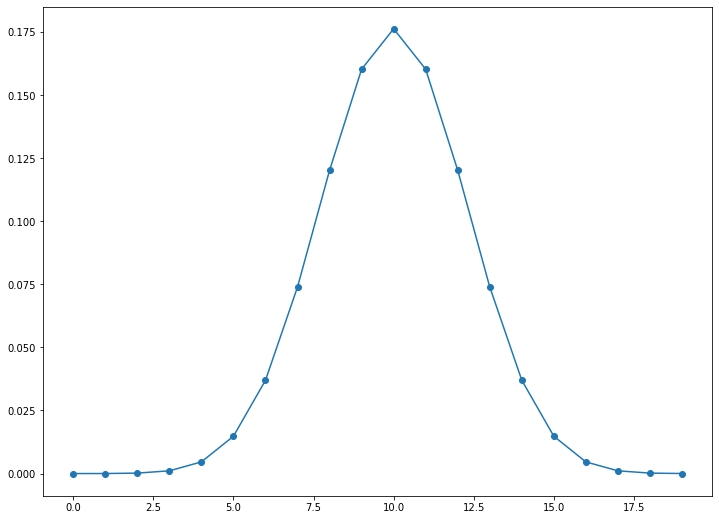

In [33]:
xx = np.array(list(range(0, 20)))
prob = 0.5
n = 20

yy = list()

for _ in xx:
    
    yy.append((np.math.factorial(n)/(np.math.factorial((n-_))*np.math.factorial(_)))*(prob**_)*(1-prob)**(n-_))



plt.plot(xx,yy, "-o")

The geometric distribution is another useful, and related, distribution. The geometric distribution gives the probability that the first occurrence of success requires k independent trials, each with success probability p. 

The probability mass function is:

$P(X=x) = (1-p)^xp$

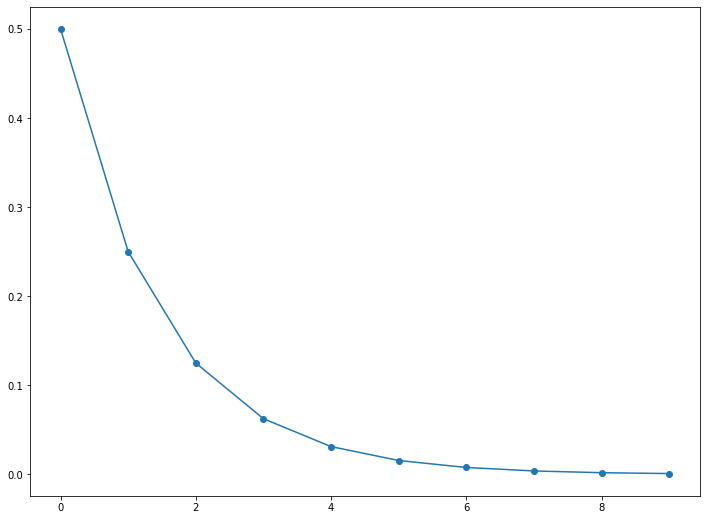

In [34]:
xx = np.array(list(range(0, 10)))
prob = 0.5

yy = ((1-prob)**xx)*prob

plt.plot(xx,yy, "-o")

Thus we see above that if we have a fair coin flip, the chance of success (say, heads) needing one trial is 0.5, the chance of it needed two trials is 0.25, the chance of it needing 3 trials is 0.125 etc. So the chance of no heads after three trials is 0.0625.

This distribution can be used to test whether a a trial is truly independent and identifically distributed. If so, then we will expect it to fit the geometric distribution. 

One use case is testing whether airport security screenings are truly random, or whether a stint of no screening results in a flurry of screens, and whether a quick succession of screens decreases the chance of a screen in the immediate period afterwards. We should see a geometric distribution if these events are truly independent of each other.

#### Poisson, Exponential, and Weibull distributions ####

The **Poisson distribution**, as mentioned earlier, is very useful for modelling the chance of x people arriving a certain point within a certain time interval e.g. 20 arrivals of people at an airport security gate within a 15 minute interval. It can be modelled thus:

$f_x(x) = \frac{\lambda^xe^{-\lambda}}{x!}$

Where:  
$\lambda$ is the avg. number of arrivals over the time period  
$f_x(x)$ is the probability of x number of people arriving in that interval

This assumes arrivals are independent and identicially distributed.

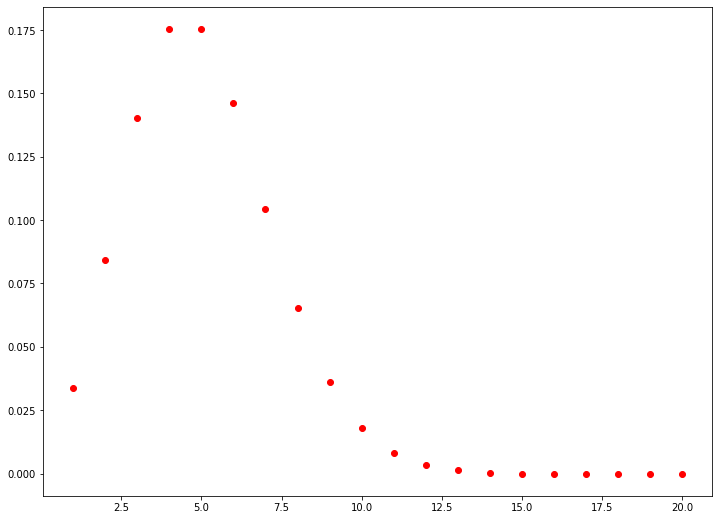

In [35]:
xx = np.array(list(range(1,21)))
yy = list()
lbda = 5

# lbda is the average number of people arriving in time period 

for _ in xx:
    yy.append((lbda**_ * np.exp(1)**(-lbda))/np.math.factorial(_))
    
plt.plot(xx,yy, "ro")
    


When the Poisson distribution models the chance of x people arriving in an interval, it follows than an **exponential distribution** models the probability of the length of interval between individual arrivals and vice versa:

Poisson Arrivals $\Longleftrightarrow$ Exponential interarrival time

$\frac{1}{\lambda}$ will be the average time between arrivals, where $\lambda$ is the avg. number of arrivals in a time period.

An exponential distribution is given:

$f_x(x) = \lambda e^{-\lambda x}$

A famous use case for this was an experiment modelling the time between arrivals at ATL airport in Georgia after 9/11. They found an exponential distribution between passengers arriving, and thus concluded that arrivals were Poisson distributed. 

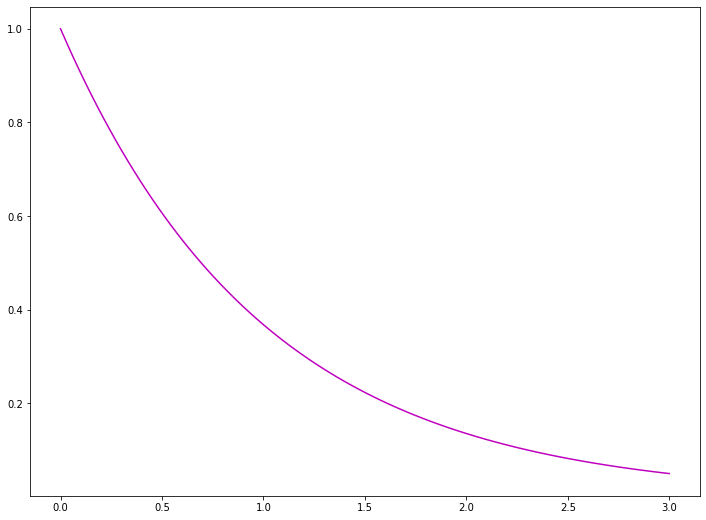

In [36]:
xx = np.linspace(0,3,100)

lbda = 1

yy = lbda*np.exp(1)**(-lbda * xx)

plt.plot(xx,yy,"m-")

Finally, a **Weibull distribution** is typically used to model how long it takes for something that wears out to fail e.g. a machine component. It is given:

$f_x(x) = \frac{k}{\lambda}(\frac{x}{\lambda})^{k-1}e^{-(\frac{x}{\lambda})^k}$

It can be used to model the chance of failure at various times in a component lifecycle. This is similar, but importantly different, from the geometric distribution. For example:

Estimating the number of times a light bulb can be switched on and off before failure: Geometric distribution

Estimating how long a light bulb can be left on until failure: Weibull distribution

Note: we have two parameters in this model. If $k = 1$, we get an exponential distribution. The above formula can be simplified to the exponential distribution algebraically in this case. Higher values of k will push the distribution along the x-axis, reflecting a lower chance of failure initially, followed by a peak where the component is most likely to wear out, followed by a decrease in probability of failure since fewer components last that long. If $k < 1$, we see a high initial failure rate that evens out, this is good at accounting for defective components.

Below we see a variety of Weibull distributions with differing values of k and $\lambda$:

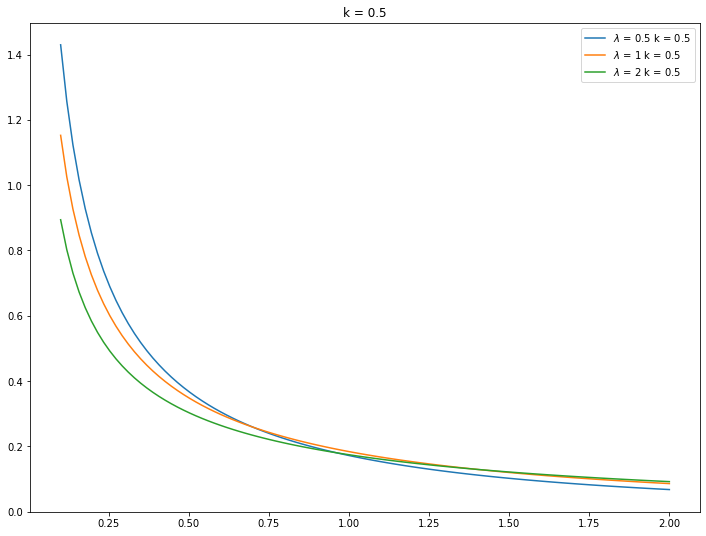

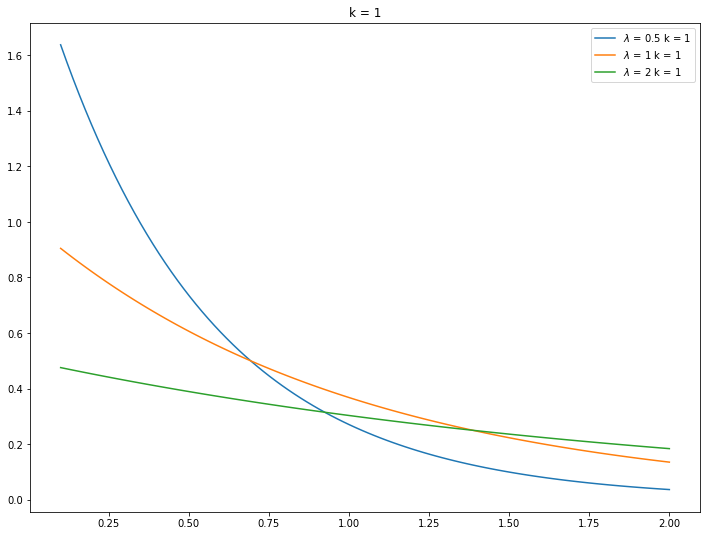

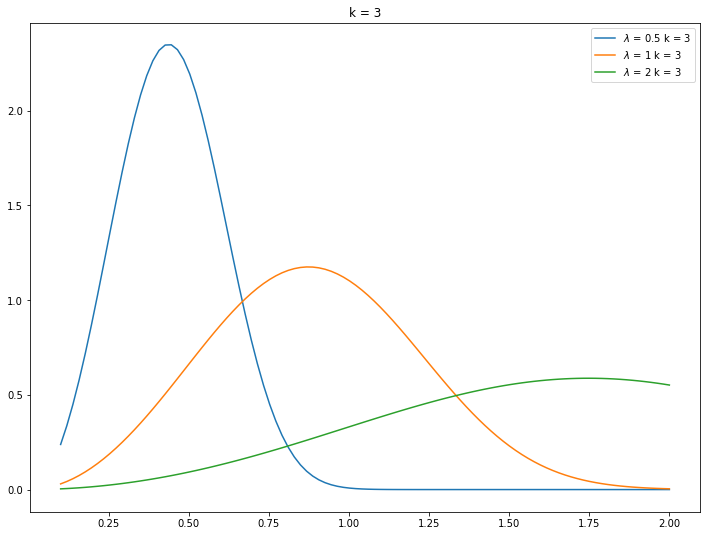

In [37]:
xx = np.linspace(0.1,2,100)

kk = [0.5, 1, 3]
lbda = [0.5, 1, 2]

for k in kk:
    for l in lbda:
        
        tempyy = (k/l)*(xx/l)**(k-1)*np.exp(1)**(-(xx/l)**k) 
        
        plt.plot(xx, tempyy, label = f"$\lambda$ = {l} k = {k}")
    
    plt.title(f"k = {k}")
    plt.legend()
    plt.show()

Note: a Q-Q (quartile-quartile) plot can be used to compare two distributions and assess their similarity. This means it can be used to check how well a data set fits to a certain distribution. 

#### Queueing ####

Probability distributions can be applied to the real world problem of queueing telephone calls for a call centre. Imagine we are cold calling people, and if they respond they are put into a queue to speak with a company respresentative. Most calls go unanswered since people hate telemarketers. 

This constitutes an optimisation problems: how many employees do we need at any given time?

This will depend on:

1) The number of calls that people at home answer.  
2) The avg. duration of a successfully connected call.

Call start (based on Poisson distribution) $\Longrightarrow$ Queue $\Longrightarrow$ C employees available (assume c = 1) $\Longrightarrow$ Call End (length of call based on exponential distribution)

With this information we can derive:

- Expected fraction fo time employee is busy
- Expected waiting time before talking to employee
- Expected number of calls in queue at a time

$\lambda =$  Avg. arrival rate   
$\mu =$  Avg. service rate

Assuming $\geq 1$ calls in queue

$P(arrival event is next) = \frac{\lambda}{\lambda + \mu}$  

$P(call end event is next) = \frac{\mu}{\lambda + \mu}$

Expected employee engagement time $= \frac{\lambda}{\mu}$

Expected wait time $= \frac{\lambda}{\mu(\mu - \lambda)}$

Expected num. of calls in queue $= \frac{\lambda^2}{\mu(\mu - \lambda)}$

This becomes more complicated if there are more than C = 1 employees.

There also may be limitations on the queue size. 

The memoryless property of the exponential function ensures that:

Distribution of remaining call time = Initial distribution of call time

Distribution of remaining time to next call arrival = Initial distribution of time until call arrival

Exponentially distributed $\Longleftrightarrow$ Memoryless

#### Counter-example ####

The time until a new tyre on a car fails is not memoryless. This is because every interval of time is not independent of the previous. 

This would need a Weibull distribution since chance of failure would increase with more use.

#### Parameters #####

The call centre example is a parametric model. The parameters would be:

Arrival Distribution: A  
Serivce distribution: S  
Number of employees: C  
Queue Size: k  
Population size: N  
Queueing discipline: D 

Where D is the set of rules governing how new calls are handled. This could be first-in first-out, or something more complex.

**Kendall notation** e.g.  M/M/1 queue, is a system of notation for queueing discipline. This can include factors like the hang-up rate, and baulking, which is when the customer knows the size of the queue and hangs up because it seems like too much time.

#### Simulation ####

Simulation is when we build a complex model for something to analyse its behaviours. 

Use cases:

- Manufacturing process
- Airport security gates
- Freight train dispatch

They are classified as either **deterministic** (no RNG) or **stochastic** (with randomness). Stochastic models will be the focus here.

**Continuous-time simulation** is when something is modelled in real time, typically using differential equations.

**Discrete-event simulations** involve change only occuring a discrete time points e.g. the binary event of a telemarketer either being on or not on a call. 

The call centre example would require some randomness since we need calls to arrival based on a Poisson distribution, for example. 

The **Arena software** can be used for this. 

Terminology:  

Entities: things that move through a sim  
Modules: part of a process  
Actions: things the model can do  
Resources: constraints on actions and possible decisions, basis for optimisation  
Decision points: choice between multiple actions  
Statistical tracking: data collected by model to inform decisions

When simulating, run the model more than one time for a reliable view of the models behaviour e.g. 100 times.

Always compare simulation behaviour with real world data to assess the model's accuracy. The averages and variances should match.


#### Prescriptive simulation ####

Sometimes simulation is used for prescriptive analytics i.e. telling us what we should do. 

For example, we might ask the following what-ifs:

- simulate change in throughput for factory if they buy a new £100,000 machine.
- expected value of hiring new employee
- where to station baggage trucks to minimise baggage-claim wait times

Some software can do heuristic optimisation of the simulation parameters.

We can compare multiple parameter options for a simulation model and introduce some randomness to each option to see how the models behave. 

Note:

- a model is only as good as the input data
- missing information or incorrect data might yield incorrect answers
- wrong assumptions make the model worthless in the real world

#### Markov chains ####

Markov chains are a form of probability-based model which are used to make comparisons. 

The models are based on the concept of **states** e.g. weather states.

For each state i in a Markov model, let:

$p_{ij}$ be the transition probability from state i to state j

$P = \begin{bmatrix}
    p_{ij} \\
\end{bmatrix}$  be the matrix of transition probabilities (transition matrix)

n/a|sunny|cloudy|rainy
---|---|---|---
sunny|0.75|0.15|0.10
cloudy|0.20|0.40|0.40
rainy|0.40|0.30|0.30

One this basis, we can establish the **long-run** probability of rain i.e. where the model converges or reaches equilibrium.

Let:

$\pi = \begin{bmatrix}
    0.5 \\
    0.25 \\
    0.25 \\
\end{bmatrix}$ which demarks the probability of the initial state of the system (sunny, cloudy, rainy)

We can now multiple the initial probability matrix by the transition matrix to get the probabilities of the different states on day 2:

$\pi P$

And on day 3:

$(\pi P) P$

So the long-run answer is essentially day $\infty$:

$\pi P^\infty$

At which point, the **impact of the initial conditions become negligible.**

We can't actually calculate this so we hypothesis some theoretical time * known as steady-state. It follows that:

$\pi* P = \pi*$ 

We thus seek to solve a system of equations such that for $\pi*$:

$\pi*P = \pi*$

and:

$\sum_i \pi_i * = 1$

However, a steady state $\pi*$ won't exist for all systems. This is true if:

- The system displays cyclical behaviour
- Every state is not reachable from every other state

**Markov chains are memoryless**. State transitions are independent and depend on the current state of the system i.e. yesterday's weather does not affect the chance of tomorrow's state. This is not necessarily true of real-world systems e.g. the weather. 

The classic use case for Markov chains is Larry Pages's page ranking alogorithm for search engines i.e. Google. Each page is a state and each link determines the transition possibilities. The steady-state probability of a state determines the rank. 

Other examples are:

- ranking college sports teams (Sokal)
- urban sprawl patterns
- population dynamics
- disease population

The memoryless property of Markov chains actually makes them less useful in real life, but in cases where they work, they work well. 

#### Missing data (week 10) ####

Missing data is inevitable (data entry errors, malfunctioning devices, deliberate omission). We should always check for patterns in missing data to see if we can see the cause. Some data is more liable to be missing than others e.g. less important. Some attributes may have n/a responses.

One way of dealing with missing data is by using **non-imputation** methods. These include:

1) Remove data points with missing values  
2) Use categorical variable to indicate omission

If we throw data away, we have the benefits:

- no error since no estimation
- easy to do

And the drawbacks:

- could lose too many data points
- could introduce censor or bias (e.g. removing all cured patients because no time of death given)

If the attribute contains categorical data, we can easy create a categorical value "missing" and use that, no problems. However, for quantitative data, this is harder.

We could set all missing values to 0, but then we need to create a binary variable to indicate that this data was missing and not actually a 0 value. However, this won't tell us if there is any observable pattern in the missing data. 

We could also create a new attribute containing an interaction term in which missing = 0 such that we identify if certain types of data point (in terms of some factor) are more liable to have missing data points. We could do this for all attributes, to see if any impact the chance of missing data.

**Imputation methods** involve **estimating missing values**. Common ways of doing this are:

- using mean or mode values
- using regression
- using regression with perturbation

The benefits of an **average** are as follows:

- won't be too wrong
- easy to compute

However, its **downside is bias** e.g. all rich people omit their income on a survey, using a mean will skew this picture and make everyone look poorer.

Alternatively, if we use **regression**, then the benefit is **less bias**.

However, the downsides are:

- complex to compute
- does not capture the variation since the same data is used twice. This can cause overfit.
- loses variation (all identical data points get same estimate)

One way to reintroduce variation is to use a perturbation to impute the values. This can be based off the degree of variation in the data set. This will be based on a normal distribution.

So again we have a trade-off:

No perturbation $\rightarrow$ avg. more accurate, variation less accurate

Perturbation $\rightarrow$ avg. less accurate, variation more accurate

As a rule of thumb, **imputed values should never constitute more than 5% of a data set (per factor)!**.

In > 5% cases, some non-imputation method will prove better.

Don't stress out about imputation bias too much; even complete data sets contain inaccuracies.





#### Optimisation (part 1) (week 10) ####

One common use of optimisation is in most machine learning models; thus, it is vital we understand it.

It is very useful in prescriptive analytics since it can yield the optimal strategy.

Examples:

- scheduling a shift pattern for workers for maxmimum coverage at minimal cost
- the deliver of crude oil to refineries to meet demand at minimum cost
- choosing webpages to be optimised in a web server to meet traffic demands
- organising production in a machine shop
- choosing a route using GPS that will minimise travel time

Thus, optimisation can inform decisions, but it's only as good as the model, and the model is only as good as it reflects the reality. 

There are 3 main components to any optimisation problem. They are:

- variables
- constraints
- objective function

The **variables** are essentially the decisions that the optimisation solver selects the optimal values for.

Example: We are scheduling a route for a political campaign. Our variables might be:

$x_i =$ total time spent in region  
$y_i =$ number of visits to region   
$z_i =$ 1 if candidate has already visited region, 0 if not  
$w_{id} =$ time in region on day d  
$v_{id} =$ 1 if candidate has visited on day d, else 0  

The **constraints** are the restrictions on the decisions above.

Example: There are 30 days left in the campaign before the election. Constraints might be:

$\sum_i x_i \leq 30$ i.e. only 30 days left

We might add the constraint that the candidate must spend 3 days in Florida on days 24-30:

$\sum_{24}^{30} v_{Florida, d} \geq 3$

We may have to link variable togethers to inform the solver of certain more obvious constraints. Remember it doesn't understand what these values represent, e.g.

If $v_{id}$ is the number of vists to region i on day d, and $y_i$ the total number of visits to region i overall, then we may need the constraint:

$\sum_d v_{id} = y_i$

The **objective function** defines how we evaluate the quality of a solution. This is normally a question of minimization or maximization. 

Imagine we want to maximize the number of expected votes in the election:

$p_i =$ population of region

$f_d =$ dilution of the effect factor (e.g. due to a late visit)

$\max \sum_i (\alpha p_i \sqrt{x_i + \frac{1}{3} \sum_{j \in N(i)} x_j} + \beta v_{id} f_d)$

We may need to use other models to establish some of these values e.g. alpha and beta

The **solution** is the set of values for the variables that best achieves the goal specified by the objective function.

A **feasible solution** is a set of values for the variables that satisifies the constraints.

The **optimal feasible solution** is the set of values for the variables that best achieves the goal specified by the objective function while obeying all constraints. 


**Example 1:** 

US government wants to choose a minimum cost diet for its soldiers:

n types of food
m types of nutrient

$a_{ij} =$ amount of nutrient j per unit of food i

$m_j =$ minimum requirement of nutrient j  
$M_j =$ maximum allowance of nurtrient j

$c_i =$ per-unit cost of food i

**Variable:**

$x_i =$ number of units of food i in diet

**Constraints:**

$\sum_i a_{ij} x_i \geq m_j$ for each nutrient j  
$\sum_i a_{ij} x_i \leq M_j$ for each nutrient j

**Objective function:**

$\min \sum_i c_i x_i$

Further constraints could be added for:

- variety in diet 
- seasonal variation in cost
- taste
- appropriate combinations

**Example 2:**

Call centre needs to meet forecast demand for day $d_i$ for each day of the week e.g. $d_{Tues} = 247$. Unions require workers to have 5 day shift patterns.

Solution is a little counterintuitive due to the union constraint.

**Variable:**

$x_i =$ number of people who start work on a given day i and then work for 5 days in a row

**Constraints:**

$\sum_j x_j > d_i$

where $\sum_j x_j$ is the sum of workers working on day i (started in the last 5 days)

$x_i \geq 0$ for all i (i.e. no negative values for number of workers)

$x_i$ is an integer (i.e. no fractional workers)

**Objective function:**

$\min 5(x_j)$

#### Optimisation with binary variables ####

Optimising with binary variables allows the construction of more complex models.

The classic example is a **stock market trading machine**.

The goal is, given a budget $B$, invest the budget in a way that balances risk and return.

$B =$ investment budget

$n$ = number of stocks available

$r_i =$ expected return of stock i at a certain time in the market

$Q_{ij} =$ covariance of returns on stocks i and j 

**Variable:**

$x_i = $ amount of money invested in stock i

**Contraints:** 

$\sum_i x_i \leq B$ (i.e. can't invest more than budget)  

$x_i \geq 0$ (i.e. can't invest negatives in stock, ignore shorting)

**Objective function:**

$\max \sum_i r_i x_i - \theta \sum_i \sum_j Q_{ij} x_i x_j$

Where: 

$\max \sum_i r_i x_i$ is the expected return

$\theta \sum_i \sum_j Q_{ij} x_i x_j$ is the risk measured by covariance

$\theta$ is a specified parameter that balances risk and return

We can also introduce further terms to the objective function if we want to account for transaction fees:

$\max \sum_i r_i x_i - \theta \sum_i \sum_j Q_{ij} x_i x_j - \sum_i t y_i$

Where:

$t$ = fixed transaction fee

$y_i$ is a binary variable, 1 if stock is purchased, else 0

We must also add the additional constraint:

$x_i \leq B y_i$

From which it follows:

$y_i = 0 \Longrightarrow x_i \leq 0 \Longrightarrow x_i = 0$ (i.e. if stock **is not** purchased, money invested is £0)

$y_i = 1 \Longrightarrow x_i \leq B$ (i.e. if stock **is** purchased, money invested is less than budget) 

We could also add a minimum investment constraint:

$x_i \geq m_i y_i$ for all stocks i (i.e. if a stock **is** purchased, investment is over the threshold $m_i$) 

We could add personal constraints for specific stocks too:

$y_{tesla} = 1$ (i.e. must invest in Tesla)

$y_{apple} + y_{google} + y_{amazon} \geq 1$ (i.e. must invest in at least one of three companies)

$y_{fedex} = y_{ups}$ (i.e. must invest in either neither or both companies)

$y_{cocacola} = 1 - y_{pepsi}$ (i.e. must invest in one or other, not both)

We can also group stocks and force a certain number of the group to be purchased:

$\sum_{j \in Energy} y_j \geq 5 y_i$ (i.e. must purchase at least five stocks in energy group)

Binary variables are thus used in the following situations:

- fixed charges are involved
- constraints exists that require us to choose between options
- constraints require matching or opposite decisions
- if-then constraints (stock x investment demands (no) stock y investment)

#### Optimisation (part 2) (week 12) ####

Here we will focus on statistic models. We can frame the models we have seen so far in the language of optimisation (since all involve optimisation at some level).

The difference is that when we frame a model in statistical terms:

- data points are variables
- things like coefficients are constants

Whereas, when we frame them in optimisation terms:

- data points are constants
- things like coefficients are variables (which we optimise)

Thus, we simply turn the problem on its head and look at how to configure the model for optimal outcomes rather than seeing how well the data set suits the model.
 
Let's look at some common models in optimisation terms:

**Linear Regression**

Variables: $a_0, a_1, \ldots, a_m$  

Constraints: n/a  

Objective function: $\min \sum_{i=1}^n (y_i - (a_0 + \sum_{j=1}^m a_j x_{ij}))^2$ (i.e. minimise squared error)

Note: with Elastic Net regression we introduce additional variable $\lambda$ which balances LASSO (fewer overall coefficients) and Ridge (lower coefficients)

**Logistic Regression**

Variables: $a_0, a_1, \ldots, a_m$  

Constraints: n/a  

Objective function: $\max \prod_{i:y_i = 1} p(x_i) \prod_{i:y_i = 0} (1-p(x_i))$

Where: $p(x_i) = \frac{1}{1+e^{-(a_0 + \sum_{j=1}^m a_j x_{ij})}}$

**Hard classification SVM**

Variables: $a_0, a_1, \ldots, a_m$  

Constraints: $(a_0 + \sum_{j=1}^m a_j x_{ij})y_i \geq 1$ for each i  

Objective function: $\max \sum_{j=1}^m (a_j)^2$

**Soft classification SVM**

Variables: $a_0, a_1, \ldots, a_m$  

Constraints: n/a  

Objective function: $\min \sum_{i=1}^n \max{\{0, 1 - (\sum_{j=1}^m a_j x_{ij})y_i) \}} + \lambda \sum_{j=1}^m (a_j)^2$

Where: 

$\max{\{0, 1 - (\sum_{j=1}^m a_j x_{ij})y_i) \}}$ handles classification error 

$\lambda \sum_{j=1}^m (a_j)^2$ influences the margin

**Exponential Smoothing**

Variables: $\alpha , \beta, \gamma$

Constraints: 

$0 \leq \alpha \leq 1$  
$0 \leq \beta \leq 1$  
$0 \leq \gamma \leq 1$

Objective function:

$\min \sum_{t=1}^n (x_t - \hat{x}_t)^2$ (i.e. minimise prediction error)

**ARIMA**

Variables: $\mu , \varphi_i, \theta_i$

Constraints: n/a

Objective function: $\min \sum_{t=1}^n (x_i - \hat{x}_t)^2$

Where: 

$D_{(d)t} = \mu + \sum_{i=1}^p \alpha_i D_{(d)t-i} - \sum_{i=1}^q \theta_i (\hat{x}_{t-i} - x_{t-i})$

**GARCH**

Variables: $\omega , \beta_i , \theta_i$

Constraints: n/a

Objective function: $\min \sum_{t=1}^n (\sigma_t^2 = \hat{\sigma}_t^2)^2$ (i.e. minimise variation prediction error)

Where:

$\sigma_{t}^2 = \omega + \sum_{i=1}^p \beta_i \sigma_{t-i}^2 + \sum_{i=1}^q \gamma_i \epsilon_{t-1}^2$

**k-means clustering**

$x_{ij} =$ coordinate j of data point i

Variables: 

$z_{jk} =$ coordinate j of cluster centre k

$y_{ik} =$ binary variable: 1 if i in cluster k, else 0 

Constraints:

$\sum_k y_i k = 1$ for all data points i (i.e. all data points assigns to 1 and only 1 cluster)

Objective function: 

$\min \sum_i \sum_k y_{ik} \sqrt[p]{\sum_j (x_{ij} - z_{jk})^p}$ (i.e. minimise the sum of distance)

These are just some examples of how models can be framed in optimisation terms. There are many more.

#### Classifying optimisation models ####

There general structure of an optimsation model can be given thus:
    
$x$ = vector of variables

$\min f(x)$ or $\max f(x)$ = objective function

subject to:

$x \in X$ 

where $X$ is some set of values

However, this is very general. We can be more specific and in doing so, find more specific subcategories of problem. 

#### Linear programs ####

An optimisation can be described as linear program if:

1) $f(x)$ is a linear function e.g.

$\min or \max C + \sum_{i=1}^n c_i x_i$

2) Constraint set $X$ is defined by linear equations and inequalities e.g.

$\sum_{i=1}^n a_{ij} x_i \leq b_j$  
$\sum_{i=1}^n a_{ij} x_i = b_j$  
$\sum_{i=1}^n a_{ij} x_i \geq b_j$

Linear programs are extremely fast and easy to solve!

#### Convex quadratic programs ####

This is essentially the same as a linear program except that instead of a linear function, we have a convex quadratic function. 

Either we $\min f(x)$ or $\max -f(x)$ i.e. try to get closer to 0

This is also fast and easy to solve, but not quite as fast and easy as a linear program.

#### Convex optimisation programs ####

This definition applies if:

1) Objective function $f(x)$ is:
       - concave (if maximising)
       - convex (if minimising)
       
2) Constraint set $X$ is a convex set

Note: geometrically, a convex set is a set wherein any two points within the set can be joined by a straight line without going outside the bounds of the set.

These are relatively fast and easy to solve, but the solutions take longer than the above programs.

#### Integer programs ####

This is similar to a linear program except that some or all variables are restricted to integer values.

This includes binary variables.

They are **surprisingly tricky to solve**, even with good software.

#### General non-convex programs ####

These tend to be **very hard to solve**, requiring a lot of time. There are no quick solutions with these types of problem.

So, if rank the different program classifications from easiest to hardest, we have:

1. Linear
2. Convex quadratic
3. General convex
4. Integer 
5. General non-convex

However, if we find a problem too hard to solve, we can use a **heuristic approach**. 

#### Network optimisation ####

One **sub-type** of linear program is a **network optimisation problem**. 

These are very easy for a computer to solve, even among linear programs.

These problems can be visually as a graph with nodes and edges. 

Let:

$i$ be some node in the graph

Variable: $x_{ij}$ which gives the the weight of edge between node i and node j

Constraints:

Flow into node = Flow out of node

$x_{ij} \leq \max$

$x_{ij} \geq \min$ 

Objective function: Linear function of the variables 

There exist many extremely powerful algorithms to solve these quickly since such problems are so frequently used in analytics.

It is a logical necessity that, if the data is entirely in integers, then the optimal solution will all in integers. This is a logical consequence and not a constraint. 

The most common use for these models is to find the shortest route between two nodes, which is how Google maps works!

We also see these models used in work assignment models (i.e. assigning workers for maximum efficiency at minimum cost) and in maximum flow models (e.g. directed oil through a network of pipes to meet demand cost effectively).






#### Stochastic optimisation ####

In previous models, we assumed:

- parameters could be treated as known values
- assumed forcasts had expected values with no uncertainty

However, what if data or parameters aren't know exactly. This would mean we need to introduce randomness to the optimisation problem. Assuming precision will lead to worse outcomes. 

There are various ways to try to solve these problems:

1) Model conservatively 

This simply means introducing some threshold $\theta$ to the model to ensure some "leeway" that will hopefully account for the variation.

2) Scenario modelling 

This is where we model a number of scenarios that could happen and try to account for all of them e.g.

Scenario 1: two small recurring bugs after software launch  
Scenario 2: one major bug three days after launch  
Scenario 3: two major immediate bugs  
Scenario 4: catastrophic failure after 10,000 sign ups 

If we can satisfy the conditions for all scenarios, this is known as a **robust solution**. However, this can lead to very high costs.

An alternative solution is to estimate the probability of each scenario, and then build a model that yields an answer relative to these probabilities, which will be a trade-off between risk and cost. 

So far we we have **only looked at mathematical programming models** with the structure:

- variables
- constraints
- objective function

However, there are other kinds of optimisation model with different structures.

One such kind is a **dynamic programming model**. 

Such modes involve:

- states (the exactly situation and its variables)
- decisions (the choice of next state)

Something called **Bellman's equation** can be used to determine the optimal decisions for the next state.

This assumes no uncertainty. 

With uncertainity, we might need a **stochastic dynamic program**, which involve using probabilities to decide the next state. 

A **Markov decision process** is a kind of stochastic dynamic program with discrete states and decisions wherein the probabilities depend solely on the previous state.





#### Basics of optimisation algorithms ####

The essence of an optimisation algorithm is as follows:

1. Find a simple solution (simple, not optimised, infeasible)

2. Find an improvement direction t:
    - use a step size $\Theta$ to move along it
    - new solution = old solution + $\Theta t$
    - repeat
    
3. Stop when movement in t no longer improves outcome

This is essentially expectation-maximisation. It is best if we can frame the problem in linear algebra and treat the improvement direction as a vector in n dimensional space.

Newton's method for finding roots (covered in Calc 1) is a good example of a method along these lines. 

$x_{n+1} = x_n - 1 \frac{f(x_n)}{f'(x_n)}$

1 here is the step size

$\frac{f(x_n)}{f'(x_n)}$ is the improvement direction.

A method like this should hopefully converge on the optimal solution. This happens in the case of a **convex optimisation problem**.

When a problem is **non-convex**, it follows that an approach like this will not always yield the optimal solution. Problems include:

- the approach yields an infeasible solution
- the approach yields a local optimum rather than the global optimum

Below we see an example of a non-convex function:

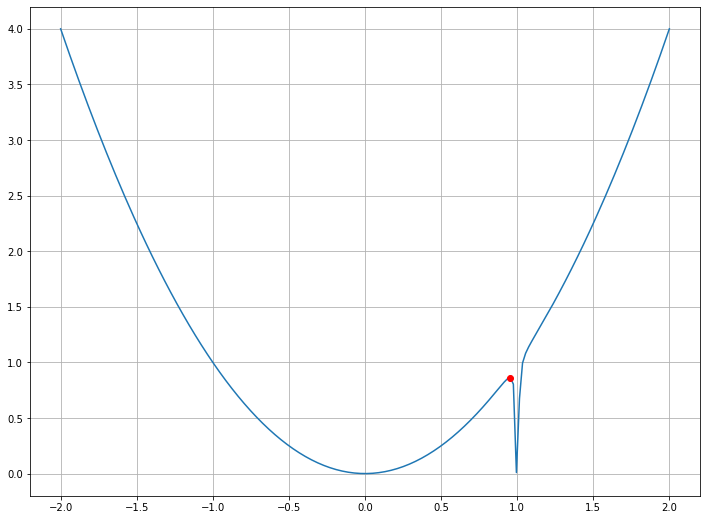

In [38]:
xx = np.linspace(-2,2,200)

yy = xx**2 + np.exp(-1/(100*(xx-1))**2) - 1

x = 0.95

y = x**2 + np.exp(-1/(100*(x-1))**2) - 1

plt.plot(xx,yy)
plt.plot(x, y, "ro")
plt.grid()
plt.show()

For the above, a standard optimisation approach may yield the local maximum at $x \approx 0.95$ instead of giving us the actual solution.

#### Advanced Models (week 12) ####

The first thing covered in this section will be **non-parametric** methods.

A test is called non-parametric if it **makes no assumptions about the distribution of the population**.

This includes some niche statistical tests that are often overlooked in stats classes. This is because most hypothesis testing assumes we know the underlying statistical distribution e.g. normal.

#### McNemar's Test ####

This is used to compare the results of two pairs of response e.g. when two different methods were used for the same goal.

The classic example is **two treatments for the same disease**.

Imagine that:

Treatment A yields 61 successes 
Treatment B yields 68 successes

What is just luck? Or is there a real difference between the treatments?

**Scenario 1**

32 cases no effect
61 cases where both treatments succeeded 
7 cases where B worked but A didn't
0 cases where A worked but B didn't

Thus we can conclude that B is the better treatment with confidence p = 0.02 (accept since p < 0.05)

**Scenario 2**

12 cases with no effect
41 cases where both treatments succeeded #
27 cases where B worked and A didn't
20 cases where A worked and B didn't

Thus we cannot conclude that B is the better treatment. Confidence = p = 0.38 (reject since p > 0.05)

McNemar's test only looks at the cases where A and B got different results and then uses a binomial distribution to determine the expected difference. 


#### Wilcoxon signed rank test for medians ####

This test assumes that the underlying distribution is continuous and symmetric. The standard version is for a single data set. 

Let us pick some value $m$. This test will let us check whether the median of the distribution is likely to be different from m. 

Let:

$y$ be a set of n responses $
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \ldots \\
    y_n
\end{bmatrix}$ 

1. First we rank $|y_1 - m|, |y_2 - m|, \ldots, |y_n - m|$ from smallest to largest.

2. $W = \sum_{y_i > m} rank(y_i - m)$ i.e. sum of all ranks where $y_i > m$

3. p-value test for W (using normal distribution)

If the probability of getting this value W is small, we can conclude that m is probably not the median.

There is also another version of this test: **the Wilcoxon test for paired samples**. 

In this case, we use the pair of responses instead of m. i.e. given pairs $(y_1, z_1), \ldots, (y_n, z_n)$ for two sets of observations. We then rank $|y_1 - z_1|, |y_2 - z_2|, \ldots, |y_n - z_n|$ from smallest to largest.

This paired test is similar to the McNemar test, except in that it deals with **continuous data** rather than dichotomous data. 

#### Mann-Whitney test ####

This is used for for two separate data sets where the two data sets are not paired (i.e. different number of values).

This test also tests whether the medians of two samples are the same. 

$H_0: \tilde{x}_1 = \tilde{x}_2$

Given two independent sets of non-paired observations:

$y_n =
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \ldots \\
    y_n
\end{bmatrix}$ 

$z_m =
\begin{bmatrix}
    z_1 \\
    z_2 \\
    \ldots \\
    z_m
\end{bmatrix}$ 

1. Rank all values in response vectors.  


2. Let U be the smaller of the ranked vectors.  
    - $U = \min{U_y, U_z}$
    - $U_y = \sum_{i=1}^n rank(y_i) - \frac{n(n+1)}{2}$
    - $U_z = \sum_{i=1}^m rank(x_i) - \frac{m(m+1)}{2}$  
    
    
3. Find significance of U (using table or software)  

#### Baynesian Modelling #### 

Baynesian results can be counterintuitive. They are based on **Baynes' theorem** which is a conditional rule of probability:

$P(A|B) = \frac{P(B|A) P(A)}{P(b)}$

Where $P(A|B)$ is the probability of A given B.

Imagine we carry out a medical test wherein:

TP = 98%
FP = 8%
1% of population has disease
8.9% of people tested are deemed positive.

A: has disease
B: tests positive

Thus:

$P(A) = 1\%$  
$P(B) = 8.9\%$
$P(B|A) = 98\%$ (i.e. the chance of a positive test given someone has the disease)

Thus:

$\frac{98 \cdot 1}{8.9} = 11.01$

Thus the chance of having the disease given a positive test $P(A|B)$ is only 11.01%! This is counterintuitive given the TP rate of 98% only an 8% FP rate!

#### Empirical Baynesian modelling ####

This form of modelling is used when the overall distribution is known or estimated, but the there is only a little data.

Example: Predicting basketball outcomes 

X is the difference in points scored between home and away teams

This is approximately normal $X \sim N(0, \tau^2)$ 

Where $\tau^2$ is the variance

x = observed point difference for game

m = real difference is calibre between two teams (which is currently unknown)

Thus:

$P(M=m|X=x) = \frac{P(X=x|M=m) P(M=m)}{P(X=x)}$

It turns out that m is also normally distributed:

$M|X = x \sim N(\frac{\tau^2}{\tau^2 + \sigma^2}(x-h), \frac{\tau^2 \sigma^2}{\tau^2 + \sigma^2})$

$\tau, \sigma, h$ can all be calculated with past data, allowing us to find the calibre difference m

Not only this, but we can integrate this difference on the interval $[1, \infty]$ to find the probability of one team being better than another. 

$P(hometeambetter|X=x) - \int_0^\infty P(M=m|X=x)dm$

What they actually found that a 20 point lead for the home team means in reality only a 3.5 point calibre difference, which due to home team advantage (+4 points) means that the home team is likely to lose on the away leg. This was confirmed empirically. 






#### Community graphs ####

These models are used to answer questions about large interconnected populations. 

Use case:

- how marketing messages travel through social media networks
- disease spread through populations
- computer virus spread through networks
- how words get loaned into foreign languages
- how terrorist networks communicate

Typically these focus on **highly connected groups of nodes** in a network known as **communities**.

**A clique** is a community in which **all nodes are connected**, but here will focus on simply communities which do not have such a strict definition. 

The **Louvain algorithm** is used to separate a graph into communities i.e. maximise modularity of the graph.

Let:

$a_{ij}$ be the weight of the edge between node i and node j

$w_i$ be the total weight of all edges connected to node i

$W$ be the total weight of all edges in the graph

$Modularity = \frac{1}{2W}\sum_{i,j} in same community (a_{i,j} - \frac{w_i w_j}{2 w})$

Modularity is thus a measure of how well a community can be separated into communities.

Step 0: treat each node as its own community

Step 1: Make biggest modularity increase by moving a node from one community to another. Repeat until not more modularity increases result from changes.

Step 2: Treat each community as a node. Repeat the same process as Step 1 for our new supernodes. 

This is a heuristic approach and thus not guaranteed to yield the optimal answer. 

#### Neural networks and deep learning ####

Both neural networks and deep learning are used to react to patterns that we don't understand.

One classic use case is the generation and evasion of captcha verification systems. 

Others are NLP and imagine recognition.

In an **artificial neural network** we typically have **3 levels (layers) of neuron**:

- input level
- hidden level
- output level

We might, for example, have one neuron assigned to each pixel in a image for image recognition.

- each neuron gets input from higher level
- calculates function of weighted inputs
- gives input to next level

We might, for example, have an output neuron for every possible letter that might appear in a captcha. The one with the highest probability is our guess. 

This is a form of **supervised learning**, since once we have our response output, we check to see if we were right and **adjust the weights of the various functions** accordingly. This is typically done using **gradient descent**.

Neural networks are really not all that great. They are hard to configure and unpredictable, yielding little insight into the problem.

**Deep learning** is a similar, and arguably better model that often gives better results. The difference here is that deep learning involves **many, many layers**, that's why it's "deep". Its applications are much the same as those of neural networks.



#### Competitive Models ####

Competitive models involve competitive decision-making. 

The models we have seen so far: descriptive, predictive, prescriptive etc., assume that the underlying nature of a problem does change and our models have reveal insight about this underlying nature.

What do we do when the system is constantly changing? What about when it react intelligently? 

This means we have a complex problem in which we must consider all sides simultaneously.

An example of this is using past purchasing data to set prices, but in the knowledge that competitors react to company's pricing decisions. 

Use cases:

- Government setting tax policies to affect the behaviour of individuals and companies in the economy
- Incentive systems for customers and employees
- Auction-like markets such as competiting on mobile phone infrastructure

Sometimes, there are systems that involve both competitive and cooperative elements: e.g. supply chain organisation and bidding.

 **Competitive decision making** is needed for all these cases. Behind this lies **game theory**.
 
 **Cooperative game theory** is used when there is also a **cooperative element**. 
 
#### Game theory example ####

Imagine two petrol stations next to each other from competitors e.g. BP and Shell. They can sell their petrol at either £2.00 or £2.50 and no other prices. The cost of a litre of petrol is £1.00.

n/a|BP@£2.50|BP@£2.00
---|---|---
**Shell@£2.50**|$\frac{d}{2}(£1.50) = £0.75d$|£0.00
**Shell@£2.00**|$£1.00d$|$\frac{d}{2}(£1.00) = £0.50d$

Above we see the profit for shell at the various prices. Both companies make money if the prices are the same. However, more profit is made if one company sells at a lower price than the competition. If both set the lower prices, both companies make profit, but they make less than if both were selling at the higher price. 

Since a competitor has an incentive to "cheat" and lower prices, this should hopefully result in both companies opting for the lower price, driving price down for consumers. 

When both companies hold the lower price, this is known as a **stable equilibrium**. This is also an example of the **prisoner's dilemma** since both companies have the incentive to "cheat" (i.e. lower prices) and take some profit that would have other gone to their competitor. 

Now imagine the cost of petrol is £1.75. This makes the profit margins lower:

n/a|BP@£2.50|BP@£2.00
---|---|---
**Shell@£2.50**|$\frac{d}{2}(£0.75) = £0.375d$|£0.00
**Shell@£2.00**|$£0.25d$|$\frac{d}{2}(£0.25) = £0.125d$

As we see, with the smaller profit margin, there is no incentive to cheat at this point since it will result in lower profits! 

Of course, in reality, prices are continuous so the model is a little different, still it follows that:

$P_{shell} > P_{BP} \Longrightarrow ShellProfit = £0.00$  

$P_{shell} = P_{BP} \Longrightarrow \frac{d}{2}(P_{shell} - cost)$

$P_{shell} < P_{BP} \Longrightarrow d(P_{shell} - cost)$ 

#### Further considerations ####

Timing: sometimes everyone is making decisions simultaneously. These decisions cannot be unmade because the market reacts instantaneously.

Hidden bids: sometimes we cannot know our competitors decisions instantly, which means we have an infinite regress of predicting the opponents strategy and countering it.

When decisions making is sequential, we have something know as a **sequential game**.

Sometimes just **doing one thing** is the ideal strategy (e.g. a specific unchanging price), this is known as a **pure strategy**. 

Sometimes a **randomised approach** is the ideal strategy, this is known as a **mixed strategy**. The game **rock, paper, scissors** is an example of a game where a mixed strategy is optimal. 

Another useful concept is that of **information levels**. 

A **perfect knowledge** situation is where all players have perfect knowledge of all other players decisions as they are made e.g. chess. 

An **imperfect knowledge** involves information asymmetry e.g. real-life gas stations where nobody can be sure of what costs the competitor is paying. 

A **zero-sum game** is essentially **winner takes all**, where a win for one person entails a loss for another.

A **non-zero-sum game** means that the **benefit can be higher or lower** for different players e.g. economics, where success does not always entail the loss of another party. 

These problems can often be treated as **optimisation problems**. 